# MASINSKO UCENJE DRUGI PROJEKAT
---

*Nada Jovanovic 1618*  
*Milica Jovanovic 1636*


## Import
---

In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN

from numpy import mean
from numpy import std
from numpy import percentile

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score, adjusted_rand_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from sklearn.datasets import make_moons

from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering

import plotly.graph_objs as go
from plotly.subplots import make_subplots

sns.color_palette("plasma")

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


## Dataset
---

In [3]:
data = pd.read_csv("data.csv")
data = data.drop(columns = [data.columns[0]])

data1 = data.copy()

data.head()

Brand  Current Price  Original Price  Discount Percentage  Rating  \
0       noise        82990.0         89900.0             7.686318     4.0   
1  fire-boltt         3799.0         16999.0            77.651627     4.3   
2        boat         1999.0          7990.0            74.981227     3.8   
3  fire-boltt         1799.0         19999.0            91.004550     4.3   
4       noise         1599.0          4999.0            68.013603     4.1   

   Number OF Ratings                              Model Name Dial Shape  \
0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk        NaN   
1            20788.0                                  BSW046        NaN   
2            21724.0                               Wave Call        NaN   
3            13244.0                                  BSW053        NaN   
4            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN   

  Strap Color Strap Material Touchscreen  Battery Life (Days) Bluetooth  \
0         NaN            NaN         NaN                  8.0       Yes   
1         NaN        Silicon         Yes                  3.5       Yes   
2         NaN        Silicon         Yes                  8.0       Yes   
3         NaN        Silicon         Yes                  3.5       Yes   
4         NaN          Other         Yes                  8.0       Yes   

  Display Size     Weight  
0          NaN  35 - 50 g  
1   1.8 inches  50 - 75 g  
2   1.7 inches  35 - 50 g  
3   1.8 inches      75g +  
4   1.7 inches  35 - 50 g

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                450 non-null    object 
 1   Current Price        440 non-null    float64
 2   Original Price       377 non-null    float64
 3   Discount Percentage  377 non-null    float64
 4   Rating               444 non-null    float64
 5   Number OF Ratings    391 non-null    float64
 6   Model Name           415 non-null    object 
 7   Dial Shape           327 non-null    object 
 8   Strap Color          327 non-null    object 
 9   Strap Material       381 non-null    object 
 10  Touchscreen          413 non-null    object 
 11  Battery Life (Days)  418 non-null    float64
 12  Bluetooth            444 non-null    object 
 13  Display Size         420 non-null    object 
 14  Weight               264 non-null    object 
dtypes: float64(6), object(9)
memory usage: 5

In [5]:
data.describe()

Current Price  Original Price  Discount Percentage      Rating  \
count     440.000000      377.000000           377.000000  444.000000   
mean    12747.554545    14598.204244            48.236894    4.031306   
std     17760.666099    15450.028869            24.109830    0.550548   
min      1199.000000     1669.000000           -79.688436    1.000000   
25%      2180.750000     5999.000000            33.337037    3.900000   
50%      3999.000000     7999.000000            54.550414    4.100000   
75%     17121.750000    17999.000000            66.677780    4.300000   
max    139990.000000    96390.000000            91.004550    5.000000   

       Number OF Ratings  Battery Life (Days)  
count         391.000000           418.000000  
mean        11594.726343            14.077392  
std         40423.889227             7.718503  
min             1.000000             0.750000  
25%            68.500000             8.000000  
50%           996.000000            17.500000  
75%          6022.000000            22.000000  
max        619130.000000            22.000000

## Vizuelizacija podataka
---


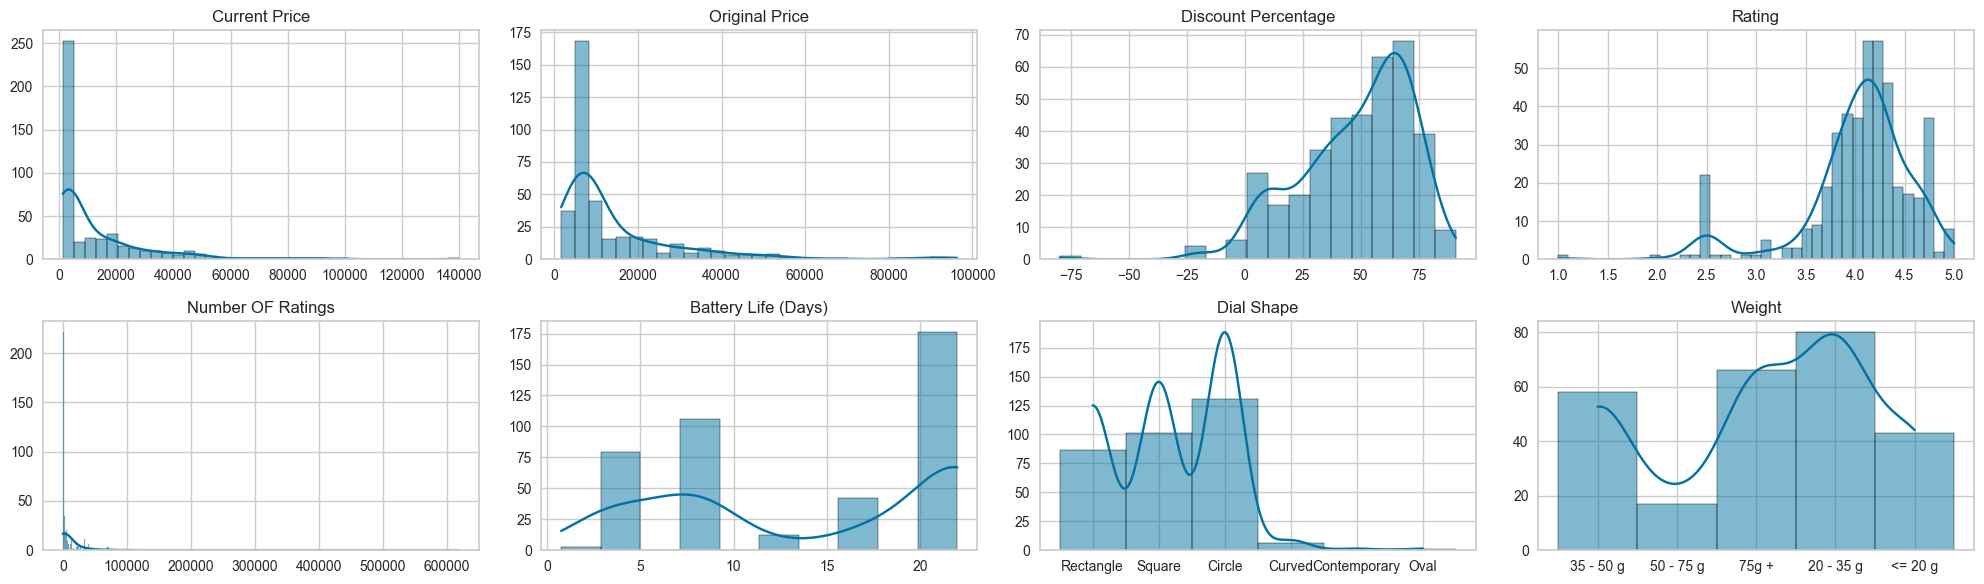

In [6]:
columns_num = ['Current Price', 'Original Price', 'Discount Percentage', 'Rating', 'Number OF Ratings','Battery Life (Days)', 'Dial Shape', 'Weight']

fig, axes = plt.subplots(2, 4, figsize=(20, 6))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.histplot(x=column_name, data=data, ax=axes[i], kde=True)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()

Moze se uociti da **Current Price**, **Original Price** i **Number OF Rating** imaju neke ekstremne vrednosti koje bi mozda trebalo ukloniti, dok **Discount percentage** sadrzi negetivne vrednosti koje treba prebaciti u pozitivne.

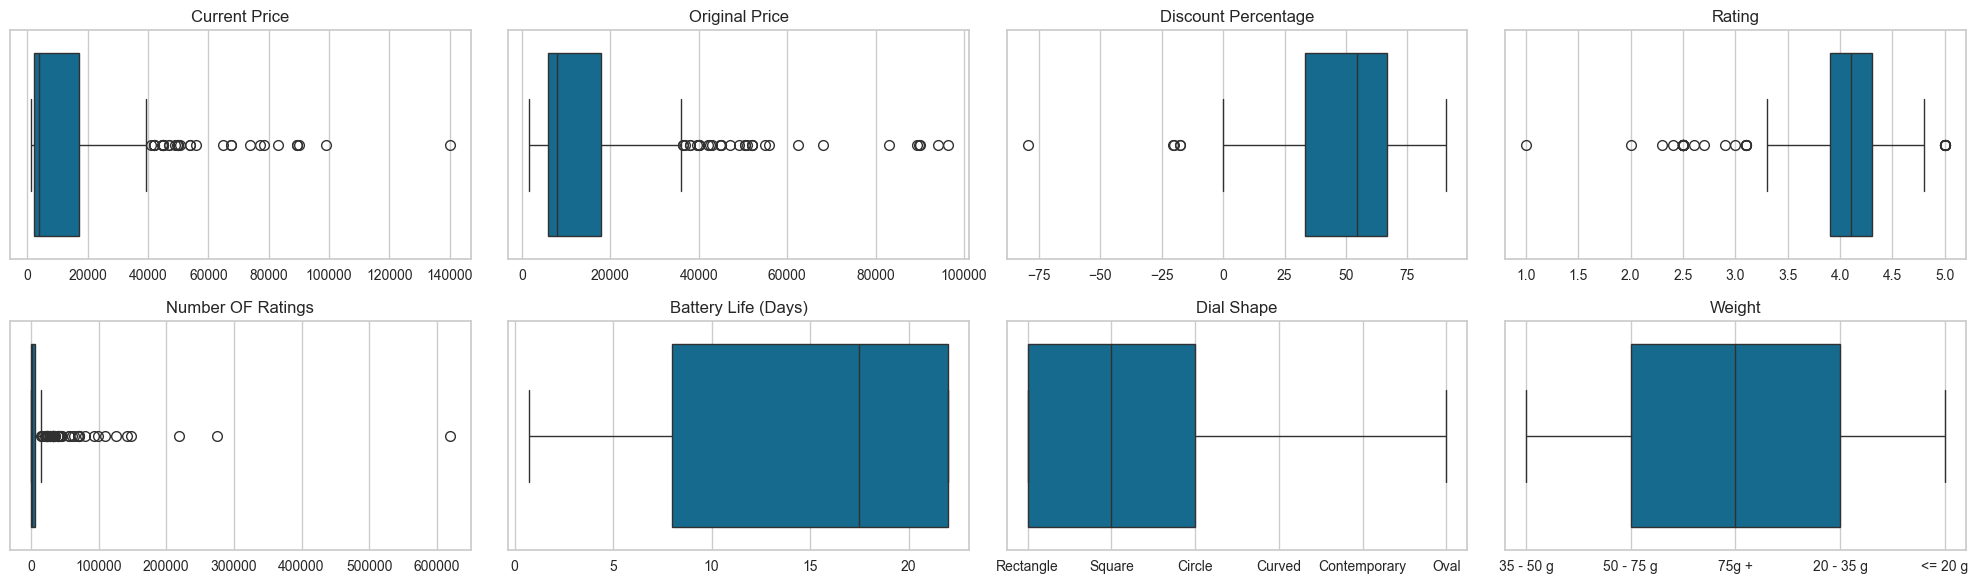

In [7]:

columns_num = ['Current Price', 'Original Price', 'Discount Percentage', 'Rating', 'Number OF Ratings','Battery Life (Days)', 'Dial Shape', 'Weight']

fig, axes = plt.subplots(2, 4, figsize=(20, 6))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.boxplot( x=column_name,  ax=axes[i], data=data)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()


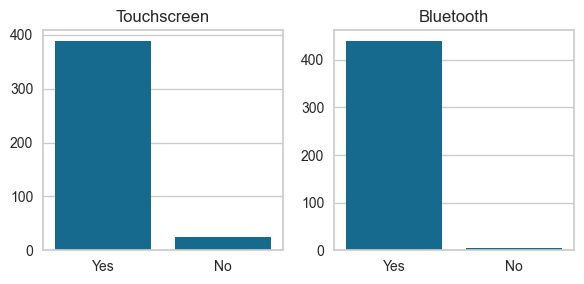

In [8]:
columns_num = ['Touchscreen', 'Bluetooth']

fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.countplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

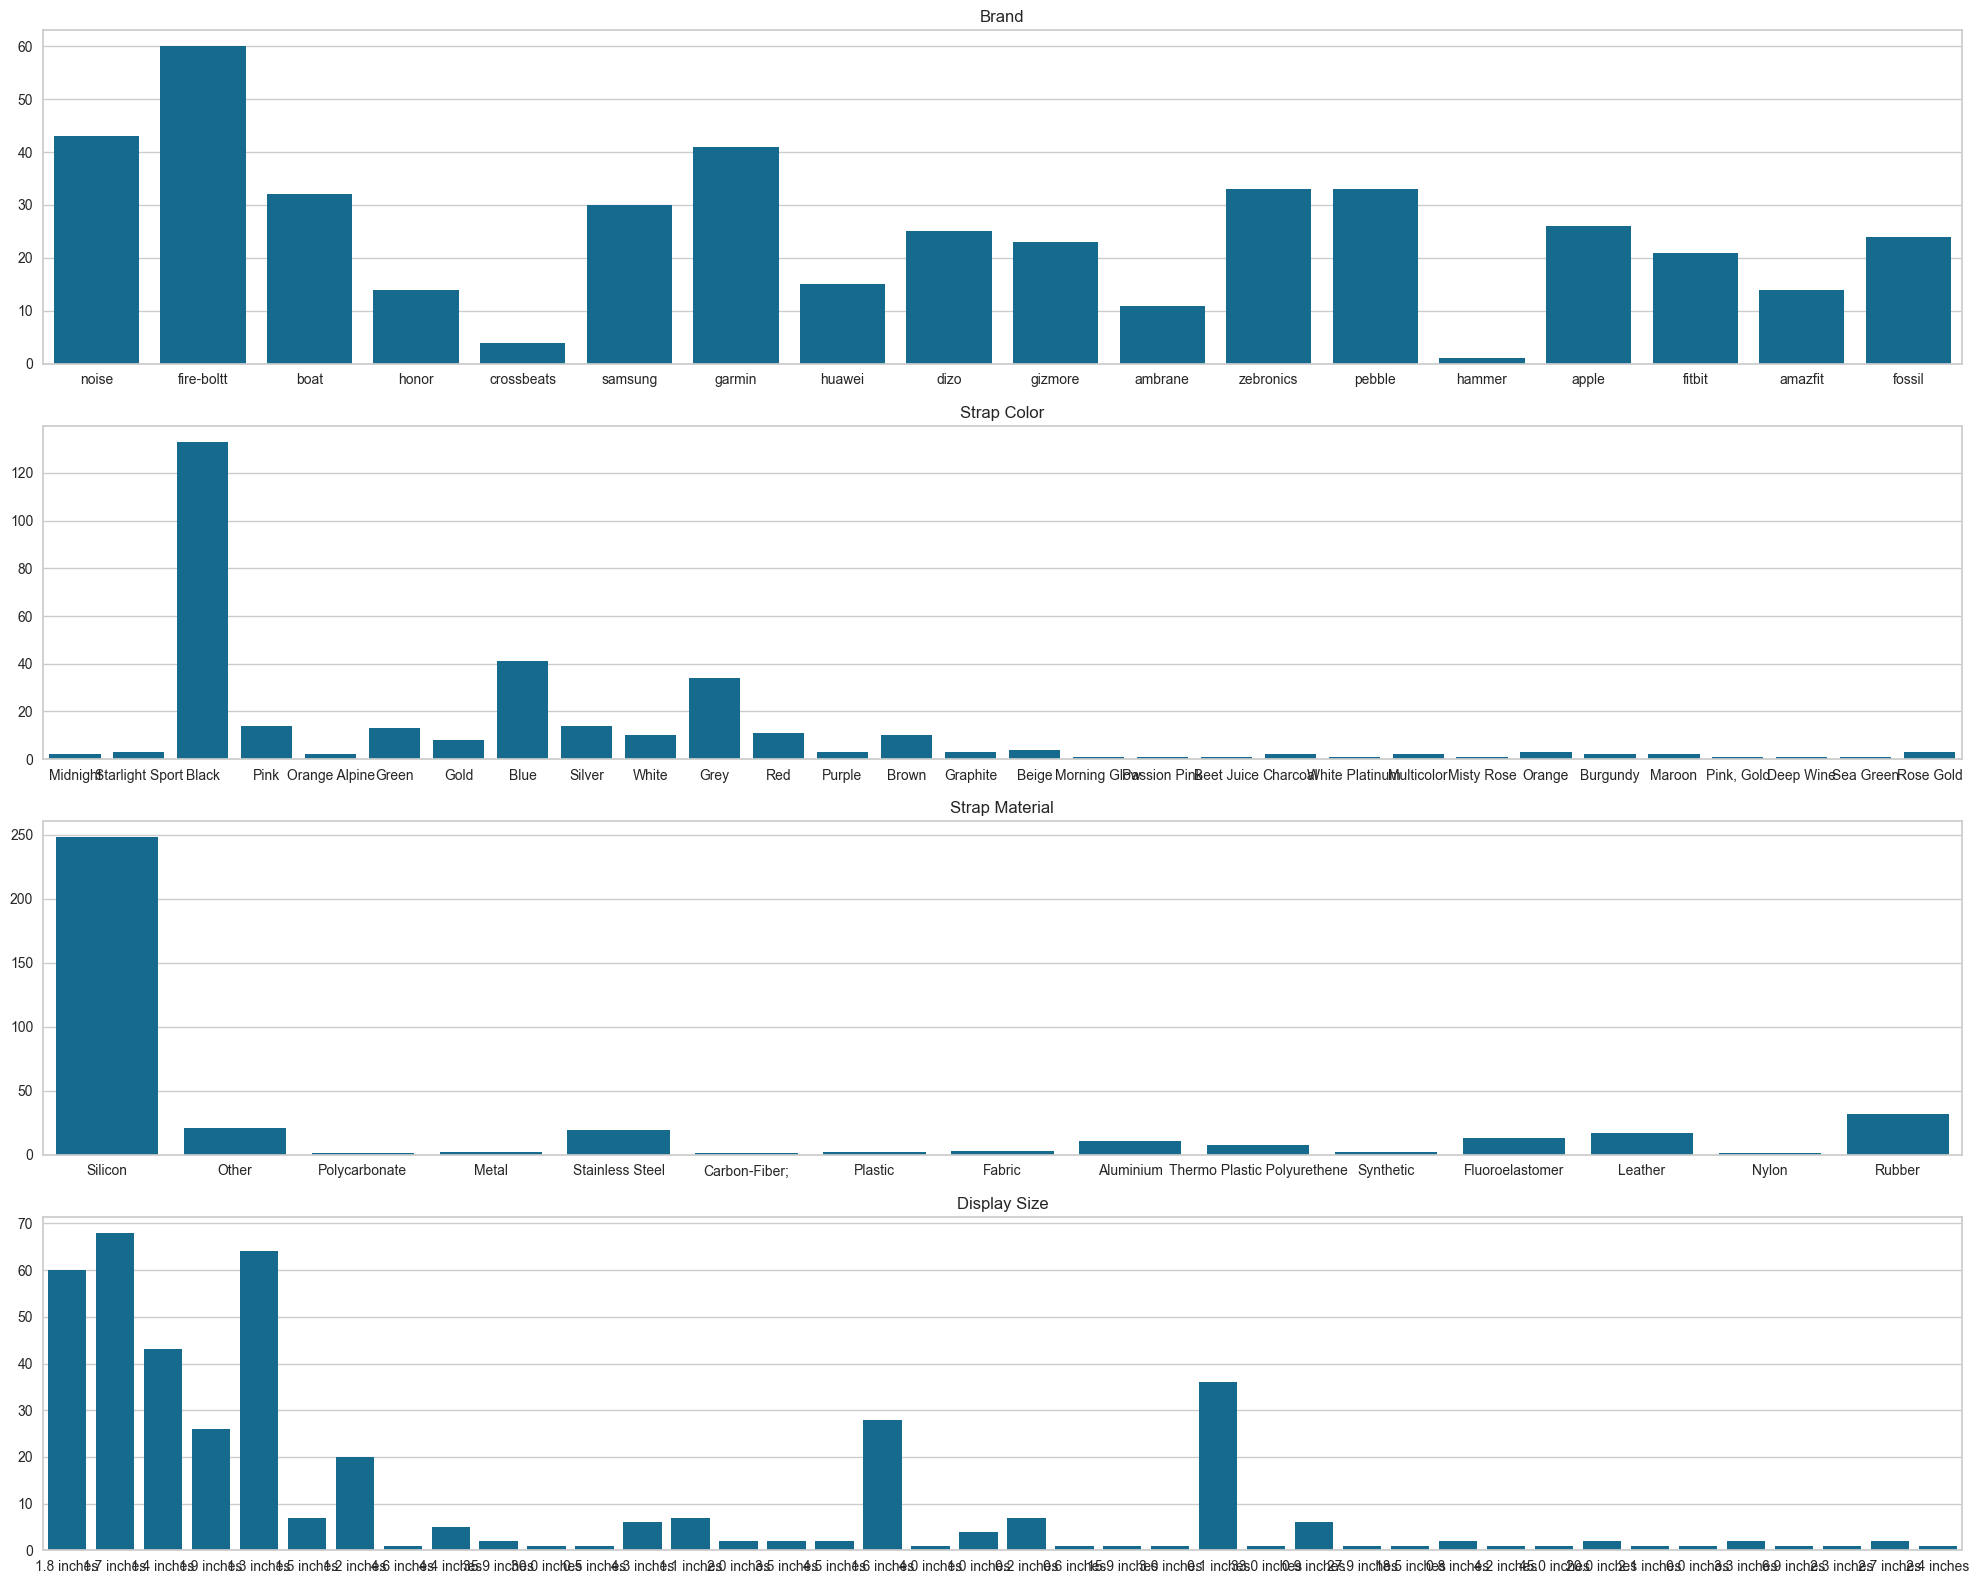

In [9]:
columns_num = ['Brand', 'Strap Color', 'Strap Material', 'Display Size']

fig, axes = plt.subplots(4, 1, figsize=(20, 16))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.countplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('', fontsize=15)
    axes[i].set_ylabel('')
    axes[i].FontSize = 5

plt.tight_layout()
plt.show()

Kod ovih kategorickig podataka može se uočiti dosta kategorija, koje bi trebalo grupisati na što manje grupa.

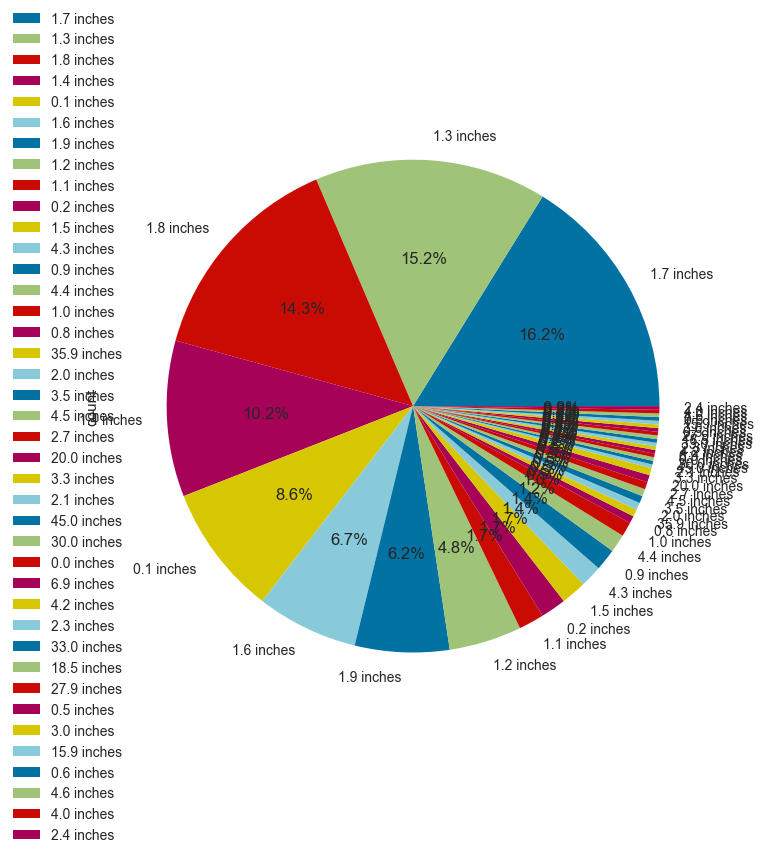

In [10]:

plt.figure(figsize=(8, 8))
pie = data["Display Size"].value_counts().plot(kind='pie',  autopct='%0.1f%%')
pie.figure.legend(loc="upper left")
plt.show()

## Transformacija podataka
----

Provera i uklanjenje duplikata:

In [11]:
print("Number Of Rows In The Original DataFrame:", len(data))

data = data.drop_duplicates()

print("Number Of Rows After Deduping:", len(data))

data1 = data1.drop_duplicates()

Number Of Rows In The Original DataFrame: 450
Number Of Rows After Deduping: 440


Izbacuje se kolona **Model Name** koja ima previše različitih vrednosti.

In [12]:
data1 = data1.drop(columns=['Model Name'])

### Određivanje i rešavanje outliera

#### Standard Deviation Method

In [13]:
columns = ['Current Price', 'Original Price',  'Number OF Ratings']

for column in columns:
    data_mean, data_std = mean(data[column]), std(data[column])
    cut_off = data_std * 2
    lower, upper = data_mean - cut_off, data_mean + cut_off

    outliers = [x for x in data[column] if x < lower or x > upper]
    data_no_outliers = data[(data[column] >= lower) & (data[column] <= upper)]

    print(f"{column} Identified outliers: {len(outliers)} ")

Current Price Identified outliers: 21 
Original Price Identified outliers: 18 
Number OF Ratings Identified outliers: 9 


#### Interquartile Range Method

In [14]:
for column in columns:
    q25, q75 = percentile(data[column], 25), percentile(data[column], 75)
    iqr = q75 - q25
  
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    outliers = [x for x in data[column] if x < lower or x > upper]

    print(f"{column} Identified outliers: {len(outliers)} ")

Current Price Identified outliers: 0 
Original Price Identified outliers: 0 
Number OF Ratings Identified outliers: 0 


#### Logaritam za ublazavanje outliera

In [15]:
for column in columns:
    data1[column] = [np.log(x) for x in data1[column]]

#### Brisanje outliera

In [16]:
data2 = data.copy()

data2 = data2[data2['Original Price'] < 60000]
data2 = data2[data2['Current Price'] < 100000]
data2 = data2[data2['Number OF Ratings'] < 100000]

data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 1 to 442
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                308 non-null    object 
 1   Current Price        308 non-null    float64
 2   Original Price       308 non-null    float64
 3   Discount Percentage  308 non-null    float64
 4   Rating               308 non-null    float64
 5   Number OF Ratings    308 non-null    float64
 6   Model Name           281 non-null    object 
 7   Dial Shape           208 non-null    object 
 8   Strap Color          208 non-null    object 
 9   Strap Material       253 non-null    object 
 10  Touchscreen          277 non-null    object 
 11  Battery Life (Days)  282 non-null    float64
 12  Bluetooth            304 non-null    object 
 13  Display Size         284 non-null    object 
 14  Weight               201 non-null    object 
dtypes: float64(6), object(9)
memory usage: 38.5+ 

In [17]:
def printHistplot(columns, data):
    fig, axes = plt.subplots(1, 3, figsize=(20, 3))
    axes = axes.flatten()
    for i, column_name in enumerate(columns):
        sns.histplot(x=column_name, data=data, ax=axes[i], kde=True)
        axes[i].set_title(column_name)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        
    plt.tight_layout()
    plt.show()


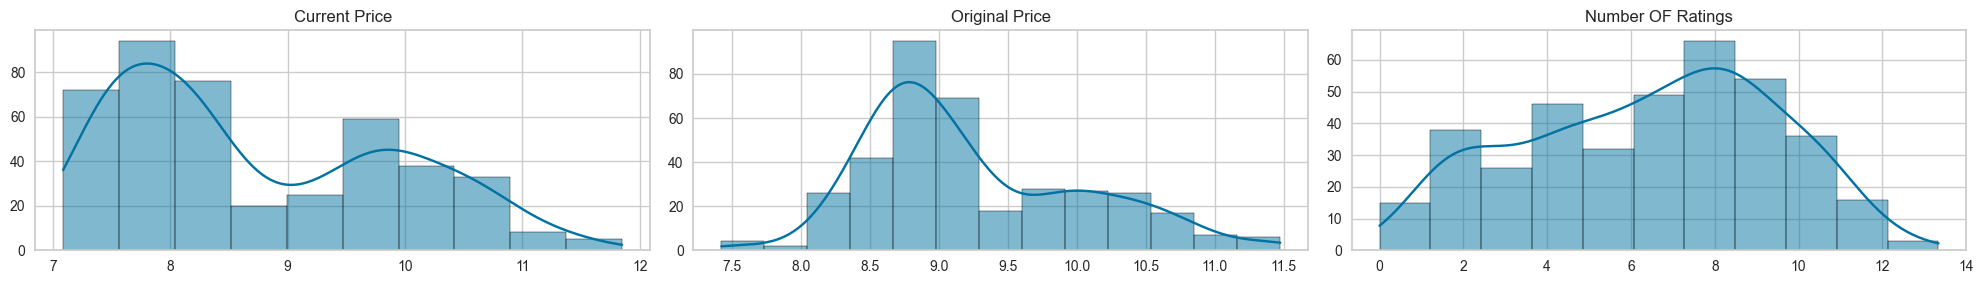

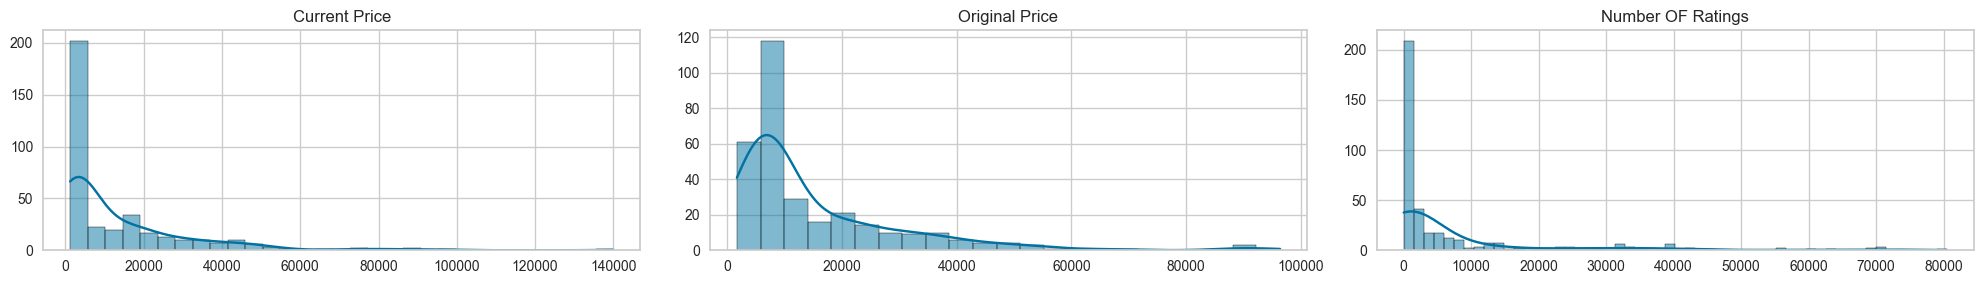

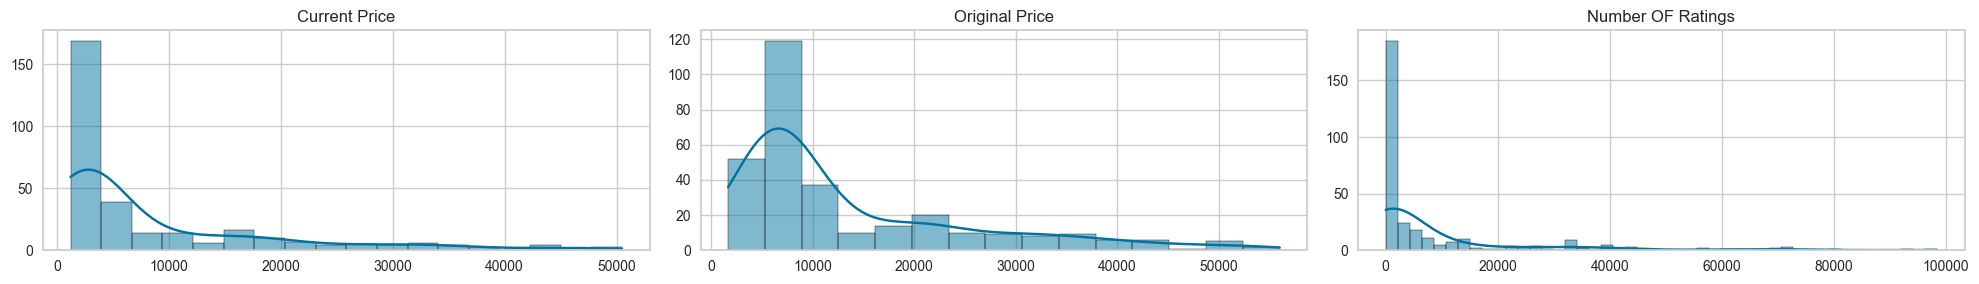

In [18]:
printHistplot(columns, data1)
printHistplot(columns, data_no_outliers)
printHistplot(columns, data2)

Pošto dataset sadrži samo 440 redova, za rešavanje outliera bira se logaritmovanje kako bi se sačuvala veća količina podataka.


Sredjivanje negativnih vrednosti u koloni **Discount Percentage**

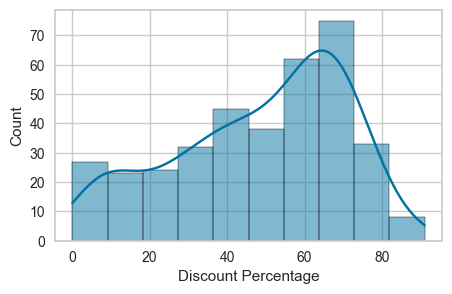

In [19]:
data1["Discount Percentage"] = [np.abs(x) for x in data["Discount Percentage"]]
plt.figure(figsize=(5, 3))
sns.histplot(x="Discount Percentage", data=data1,  kde=True)
plt.show()

### Ispitivanje nedostajućih vrednosti

In [20]:
nan_count = data.isnull().sum().sort_values()

n_miss = {}
for column in data.columns:
    n_miss[column] = {}
    n_miss[column]["Count"] = data[column].isnull().sum()
    n_miss[column]["%"] = round(n_miss[column]["Count"] / data.shape[0] * 100, 2)

pd.DataFrame.from_dict(n_miss).T


Count      %
Brand                  0.0   0.00
Current Price         10.0   2.27
Original Price        73.0  16.59
Discount Percentage   73.0  16.59
Rating                 6.0   1.36
Number OF Ratings     59.0  13.41
Model Name            33.0   7.50
Dial Shape           113.0  25.68
Strap Color          113.0  25.68
Strap Material        66.0  15.00
Touchscreen           37.0   8.41
Battery Life (Days)   32.0   7.27
Bluetooth              6.0   1.36
Display Size          30.0   6.82
Weight               186.0  42.27

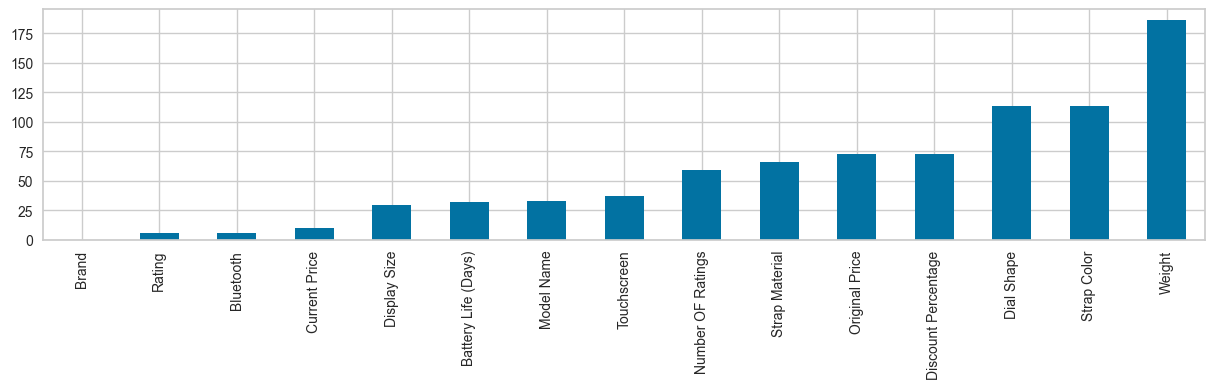

In [21]:
nan_count.plot(kind='bar', figsize=(15, 3))
plt.show()

Pošto kolona **weight** sadrži veliki broj nedostajućih vrednosti, ne uzimamo je u obzir prilikom dalje analize.

In [22]:
data1 = data1.drop(columns=['Weight'])

### Grupisanje kategoričkih podataka

In [23]:
data1["Display Size"]  = data["Display Size"].str.replace(" inches", "").astype(float).round()
print(data1['Display Size'].value_counts())

Display Size
2.0     187
1.0     144
0.0      45
4.0      17
3.0       5
36.0      2
20.0      2
5.0       1
30.0      1
16.0      1
33.0      1
28.0      1
18.0      1
45.0      1
7.0       1
Name: count, dtype: int64


In [24]:
data1['Display Size'] = data1['Display Size'].apply(lambda x: 4 if 3 <= x <= 10 else (28 if x > 10 else x))
print(data1['Display Size'].round().value_counts())

Display Size
2.0     187
1.0     144
0.0      45
4.0      24
28.0     10
Name: count, dtype: int64


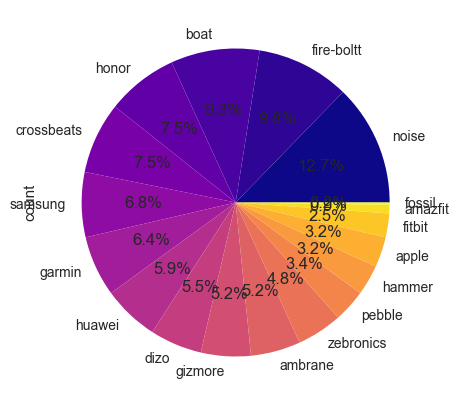

In [25]:
plt.figure(figsize=(5, 5))
pie = data["Brand"].value_counts().plot(kind='pie', labels=data["Brand"].unique(), autopct='%0.1f%%',cmap='plasma')
plt.show()

Podela brendova u 3 vrste prema populatnosti:  
1) top **15% - 7.5%**
2) middle **6.8% - 5.2%**
3) low **4.8% - 0%** 

In [26]:
scale_mapper = {
    'noise': 'top',
    'fire-boltt': 'top',
    'boat': 'top',
    'honor': 'top',
    'crossbeats': 'top',
    'samsung': 'middle',
    'garmin': 'middle',
    'huawei': 'middle',
    'dizo': 'middle',
    'gizmore': 'middle',
    'ambrane': 'middle',
    'zebronics': 'low',
    'pebble': 'low',
    'hammer': 'low',
    'apple': 'low',
    'fitbit': 'low',
    'amazfit': 'low',
    'fossil': 'low'
    }
data1["Brand"] = data["Brand"].replace(scale_mapper)

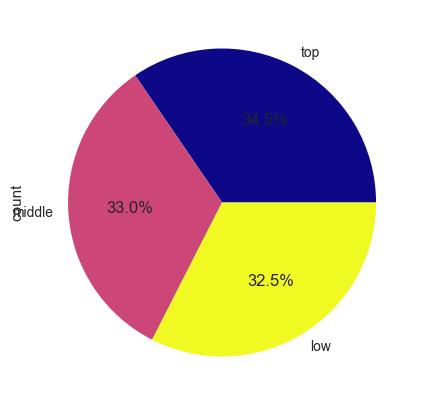

In [27]:
plt.figure(figsize=(5, 5))
pie = data1["Brand"].value_counts().plot(kind='pie', labels=data1["Brand"].unique(), autopct='%0.1f%%', cmap='plasma')
plt.show()

In [28]:
print(data["Strap Material"].value_counts())

scale_mapper = {
    'Silicon': 'Silicon',
    'Other': 'Other',
    'Rubber': 'Silicon',
    'Fluoroelastomer': 'Silicon',
    'Leather': 'Leather',
    'Metal': 'Metal',  
    'Stainless Steel': 'Metal',
    'Aluminium': 'Metal',
    'Polycarbonate': 'Other',
    'Carbon-Fiber;': 'Other',
    'Plastic': 'Other',
    'Fabric': 'Other',
    'Thermo Plastic Polyurethene': 'Other',
    'Synthetic': 'Other',
    'Nylon': 'Other'
    }
data1["Strap Material"] = data["Strap Material"].replace(scale_mapper)
print("-----------------")
print(data1["Strap Material"].value_counts())


Strap Material
Silicon                        241
Rubber                          32
Other                           21
Stainless Steel                 19
Leather                         17
Fluoroelastomer                 13
Aluminium                       11
Thermo Plastic Polyurethene      8
Fabric                           3
Metal                            2
Plastic                          2
Synthetic                        2
Polycarbonate                    1
Carbon-Fiber;                    1
Nylon                            1
Name: count, dtype: int64
-----------------
Strap Material
Silicon    286
Other       39
Metal       32
Leather     17
Name: count, dtype: int64


In [29]:
print(data['Dial Shape'].value_counts())
scale_mapper = {
    'Circle': 'Circle',
    'Square': 'Rectangle',
    'Rectangle': 'Rectangle',
    'Curved': 'Circle',
    'Contemporary': 'Circle',
    'Oval': 'Circle',
    }
data1["Dial Shape"] = data["Dial Shape"].replace(scale_mapper)
print(data1["Dial Shape"].value_counts())

Dial Shape
Circle          131
Square          101
Rectangle        87
Curved            6
Contemporary      1
Oval              1
Name: count, dtype: int64
Dial Shape
Rectangle    188
Circle       139
Name: count, dtype: int64


In [30]:

scale_mapper = {
    'Midnight': 'Black',
    'Starlight Sport': 'White',
    'Black': 'Black',
    'Pink': 'Pink',
    'Orange Alpine': 'Orange',
    'Green': 'Green',
    'Gold': 'Gold',
    'Blue': 'Blue',
    'Silver': 'Grey',
    'White': 'White',
    'Grey': 'Grey',
    'Red': 'Red',
    'Purple': 'Purple',
    'Brown': 'Brown',
    'Graphite': 'Grey',
    'Beige': 'Brown',
    'Morning Glow': 'Orange',
    'Passion Pink': 'Pink',
    'Beet Juice': 'Purple',
    'Charcoal': 'Grey',
    'White Platinum': 'White',
    'Multicolor': 'Multicolor',
    'Misty Rose': 'Pink',
    'Orange': 'Orange',
    'Burgundy': 'Red',
    'Maroon': 'Red',
    'Pink, Gold': 'Gold',
    'Deep Wine': 'Red',
    'Sea Green': 'Green',
    'Rose Gold': 'Gold'
}
data1["Strap Color"] = data["Strap Color"].replace(scale_mapper)
print('------------------')
print(data1['Strap Color'].value_counts())



------------------
Strap Color
Black         135
Grey           53
Blue           41
Pink           16
Red            16
White          14
Green          14
Brown          14
Gold           12
Orange          6
Purple          4
Multicolor      2
Name: count, dtype: int64


In [31]:

scale_mapper = {
     'Black' : 'Black',
    "Brown" : "Black",
    "Grey" : "Black",
    "Blue" : "Other",
    "Pink" : "Other",
    "Red" : "Other",
    "White" : "Other",
    "Green" : "Other",
    "Gold" : "Other",
    "Orange" : "Other",
    "Purple" : "Other",
    "Multicolor" : "Other"
}

data1["Strap Color"] = data1["Strap Color"].replace(scale_mapper)
print('------------------')
print(data1['Strap Color'].value_counts())

------------------
Strap Color
Black    202
Other    125
Name: count, dtype: int64


### Popunjavanje nedostajućih vrednosti


Strategije popunjavanja:
- *mean* za numericke vrednosti
- *mode* za kategoricke vrednosti

In [32]:
columns_mode = ['Dial Shape', 'Strap Color', 'Strap Material', 'Touchscreen', 'Bluetooth', 'Display Size']
data1[columns_mode] = data1[columns_mode].fillna(data1.mode().iloc[0])
data1.isna().sum()

Brand                   0
Current Price          10
Original Price         73
Discount Percentage    73
Rating                  6
Number OF Ratings      59
Dial Shape              0
Strap Color             0
Strap Material          0
Touchscreen             0
Battery Life (Days)    32
Bluetooth               0
Display Size            0
dtype: int64

In [33]:
columns_mean = ['Battery Life (Days)', 'Number OF Ratings', 'Rating', 'Discount Percentage', 'Original Price', 'Current Price']
data1[columns_mean] = data1[columns_mean].fillna(data1[columns_mean].mean())
data1.isna().sum()

Brand                  0
Current Price          0
Original Price         0
Discount Percentage    0
Rating                 0
Number OF Ratings      0
Dial Shape             0
Strap Color            0
Strap Material         0
Touchscreen            0
Battery Life (Days)    0
Bluetooth              0
Display Size           0
dtype: int64

In [34]:
data1.head()

Brand  Current Price  Original Price  Discount Percentage  Rating  \
0   top      11.326475       11.406453             7.686318     4.0   
1   top       8.242493        9.740910            77.651627     4.3   
2   top       7.600402        8.985946            74.981227     3.8   
3   top       7.494986        9.903438            91.004550     4.3   
4   top       7.377134        8.516993            68.013603     4.1   

   Number OF Ratings Dial Shape Strap Color Strap Material Touchscreen  \
0           4.174387  Rectangle       Black        Silicon         Yes   
1           9.942131  Rectangle       Black        Silicon         Yes   
2           9.986173  Rectangle       Black        Silicon         Yes   
3           9.491300  Rectangle       Black        Silicon         Yes   
4           9.539716  Rectangle       Black          Other         Yes   

   Battery Life (Days) Bluetooth  Display Size  
0                  8.0       Yes           2.0  
1                  3.5       Yes           2.0  
2                  8.0       Yes           2.0  
3                  3.5       Yes           2.0  
4                  8.0       Yes           2.0

### Prebacivanje kategorickih u numericke vrednosti

In [35]:
scale_mapper = {
    'Yes': True,
    'No': False }

data1["Bluetooth"] = data1["Bluetooth"].replace(scale_mapper)
data1["Touchscreen"] = data1["Touchscreen"].replace(scale_mapper)

In [36]:
data1.rename(columns={'Brand': 'B', 'Strap Color':'S_C', 'Strap Material':'S_M' }, inplace=True)
data1 = pd.get_dummies(data=data1, columns=['B', "S_C", "S_M", 'Dial Shape'])

In [37]:
data = data1.copy()
data1.head()

Current Price  Original Price  Discount Percentage  Rating  \
0      11.326475       11.406453             7.686318     4.0   
1       8.242493        9.740910            77.651627     4.3   
2       7.600402        8.985946            74.981227     3.8   
3       7.494986        9.903438            91.004550     4.3   
4       7.377134        8.516993            68.013603     4.1   

   Number OF Ratings  Touchscreen  Battery Life (Days)  Bluetooth  \
0           4.174387         True                  8.0       True   
1           9.942131         True                  3.5       True   
2           9.986173         True                  8.0       True   
3           9.491300         True                  3.5       True   
4           9.539716         True                  8.0       True   

   Display Size  B_low  B_middle  B_top  S_C_Black  S_C_Other  S_M_Leather  \
0           2.0  False     False   True       True      False        False   
1           2.0  False     False   True       True      False        False   
2           2.0  False     False   True       True      False        False   
3           2.0  False     False   True       True      False        False   
4           2.0  False     False   True       True      False        False   

   S_M_Metal  S_M_Other  S_M_Silicon  Dial Shape_Circle  Dial Shape_Rectangle  
0      False      False         True              False                  True  
1      False      False         True              False                  True  
2      False      False         True              False                  True  
3      False      False         True              False                  True  
4      False       True        False              False                  True

## Data corelation

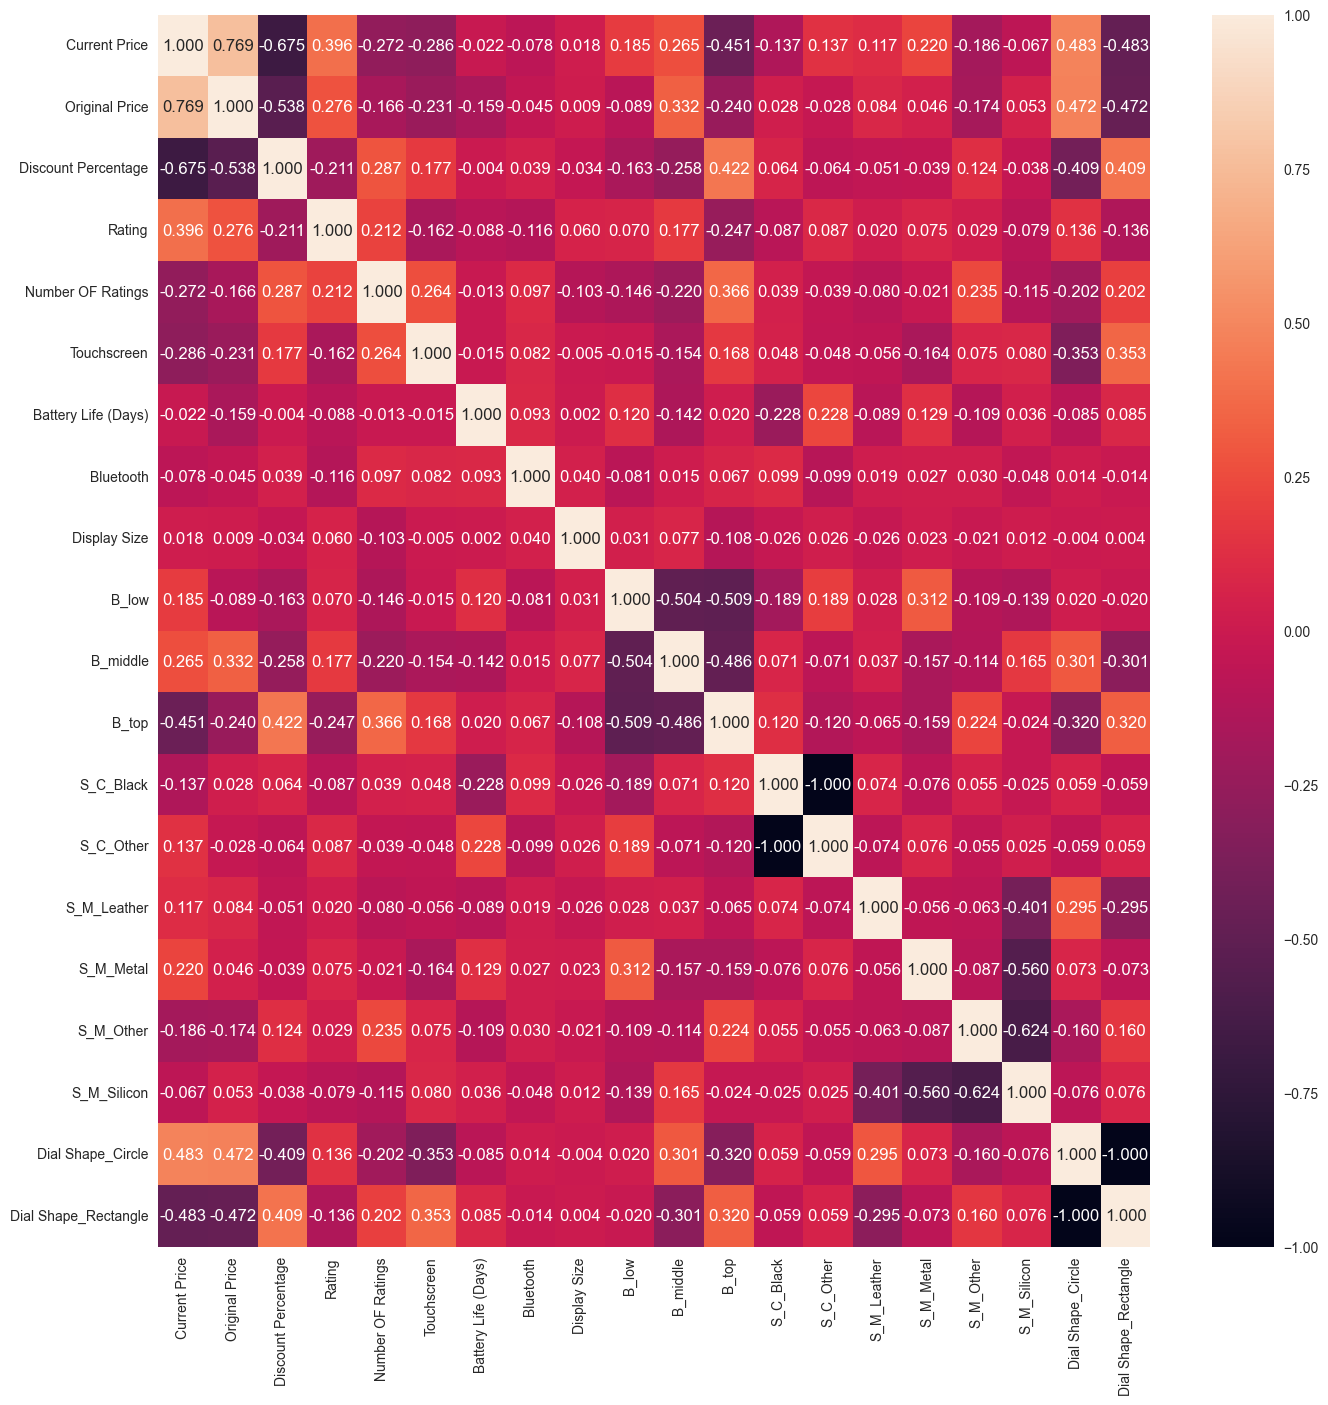

In [38]:
df_corr = data1.corr()
plt.figure(figsize = (16,16))
sns.heatmap(data=df_corr, annot=True,fmt='.3f')
plt.show()

In [39]:
data1 = data1.drop(columns=['Dial Shape_Rectangle', 'S_C_Other'])

## Standardize data

In [40]:
scaler = StandardScaler()
features_std = scaler.fit_transform(data1)
data_std = pd.DataFrame(features_std, columns=data1.columns)

The **Silhouette score** is computed by averaging the silhouette coefficient for each sample, computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering.

**Calinski and Harabasz score** is defined as ratio of the sum of between-cluster dispersion and of within-cluster dispersion.

**Davies-Bouldin score** is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score. The minimum score is zero, with lower values indicating better clustering.

In [41]:
result_df = pd.DataFrame({})

Funkcije za prikaz rezultata:

In [42]:

def printResult(y_value, X_value, claster_center):
    unique_labels = np.unique(y_value)
    fig = plt.figure(figsize=(6, 6))
    cmap = plt.cm.get_cmap('plasma')

    for label in unique_labels: 
        color = cmap(label / len(unique_labels))
        plt.scatter(X_value[y_value == label][:, 0], X_value[y_value == label][:, 1], color=color,  label=f'Cluster {label}')
        
    if claster_center is not None: 
        plt.scatter(claster_center[:, 0], claster_center[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10)

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

def printFeatureImportance(df, pred, centers = None):

    if centers is None:
        cluster_means = df.groupby(pred).mean()
    else: 
        cluster_means = centers

    fig, ax = plt.subplots(figsize=(16, 6))
    cluster_means.T.plot(kind='bar', ax=ax, cmap='plasma')
    plt.title('Feature importance')
    plt.show()

def print3D(Y, X):
    pca = PCA(n_components=3)
    PCA_components = pca.fit_transform(X)
    principalComponents = pd.DataFrame(PCA_components, columns=["f1", "f2", "f3"])

    fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])
    
    fig.add_trace(go.Scatter3d(
        x=principalComponents["f1"],
        y=principalComponents["f2"],
        z=principalComponents["f3"],
        mode='markers',
        marker=dict(size=5, color=Y, colorscale='plasma'),
        name='Scatter Plot'
    ))
    fig.update_layout(width=700, height=700)
    fig.show()

def getScore (y_value, X_value, alg_name) : 
    calinski = calinski_harabasz_score(X_value, y_value)
    silhouette = silhouette_score(X_value, y_value)
    davies = davies_bouldin_score(X_value, y_value)

    result_df.loc[alg_name, 'calinski_harabasz'] = calinski
    result_df.loc[alg_name, 'Silhouette'] = silhouette
    result_df.loc[alg_name, 'Davies-Bouldin'] = davies
    
    print("calinski_harabasz_score", calinski)
    print("Silhouette score: ", silhouette)
    print("Davies-Bouldin score: ", davies)

### Dendogram

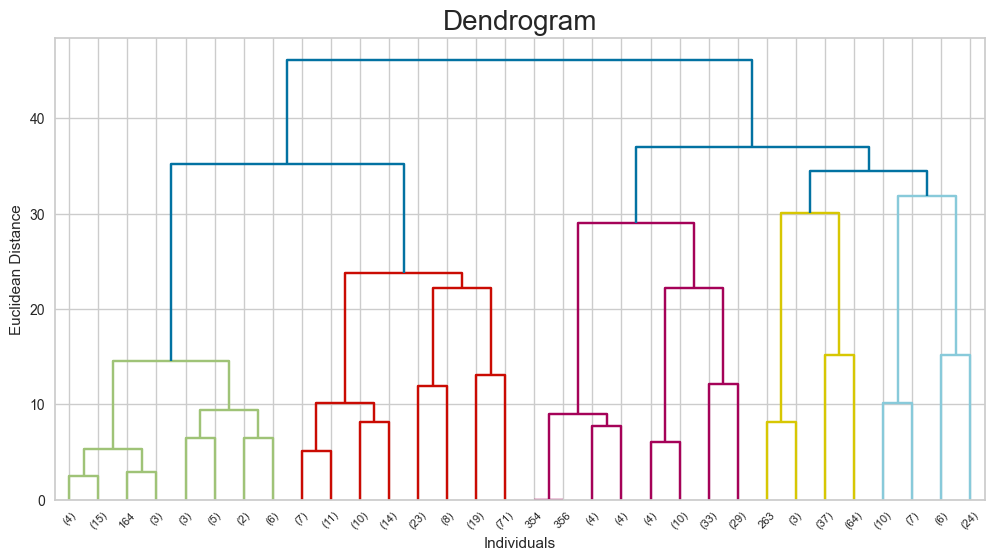

In [43]:
plt.figure(figsize=(12, 6))
linkage_matrix = sch.linkage(features_std, method='ward')

dendrogram = sch.dendrogram(linkage_matrix, truncate_mode='level', p =4)
plt.title('Dendrogram', fontsize=20)
plt.xlabel('Individuals')
plt.ylabel('Euclidean Distance')
plt.show()

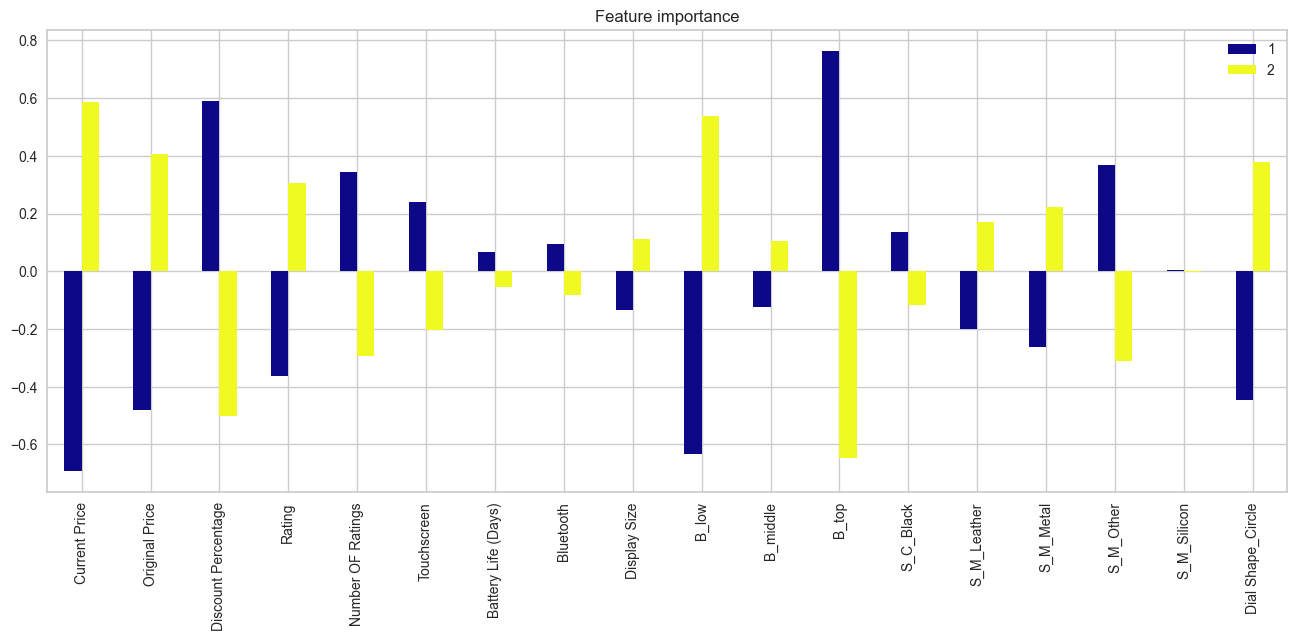

calinski_harabasz_score 68.03806291092339
Silhouette score:  0.14370293110979712
Davies-Bouldin score:  2.3316059628020356


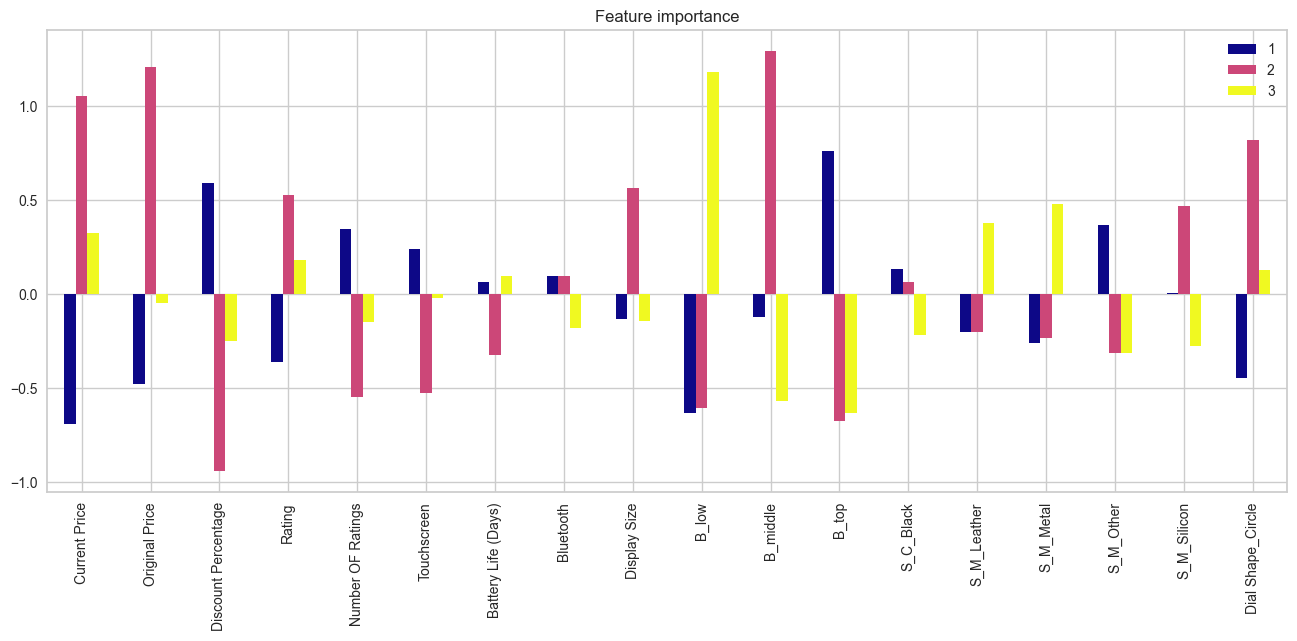

calinski_harabasz_score 61.979237350212934
Silhouette score:  0.17717574682227338
Davies-Bouldin score:  2.1669940463853874


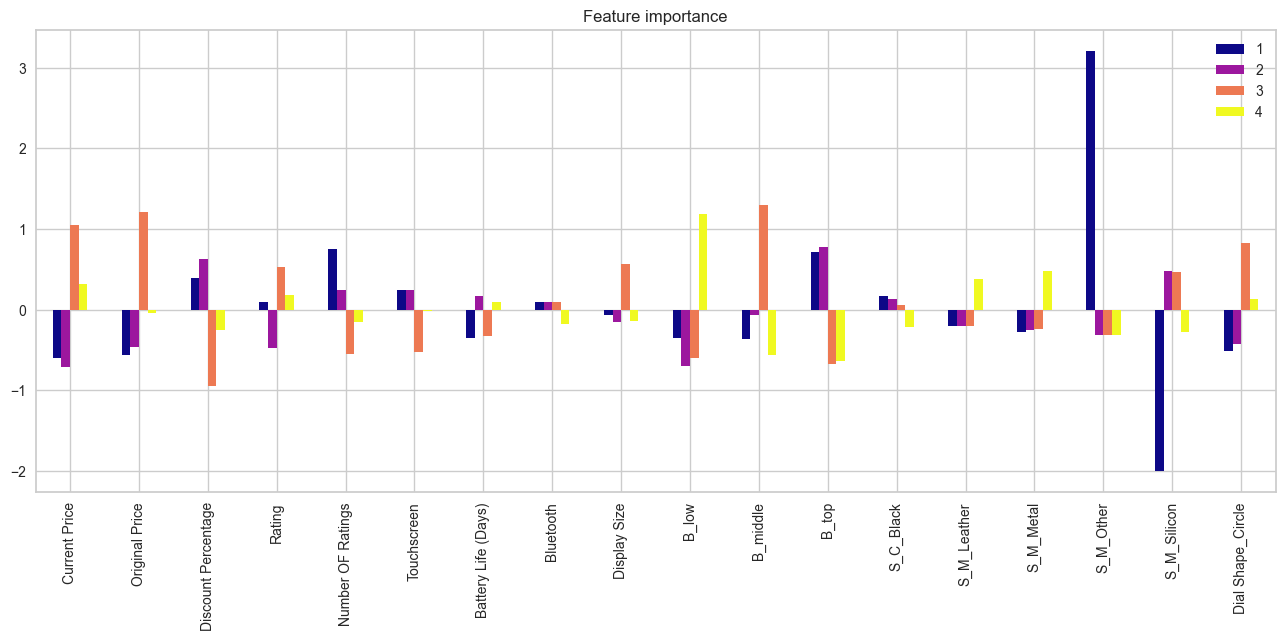

calinski_harabasz_score 62.070777823050854
Silhouette score:  0.20016127498738598
Davies-Bouldin score:  1.8627128025065183


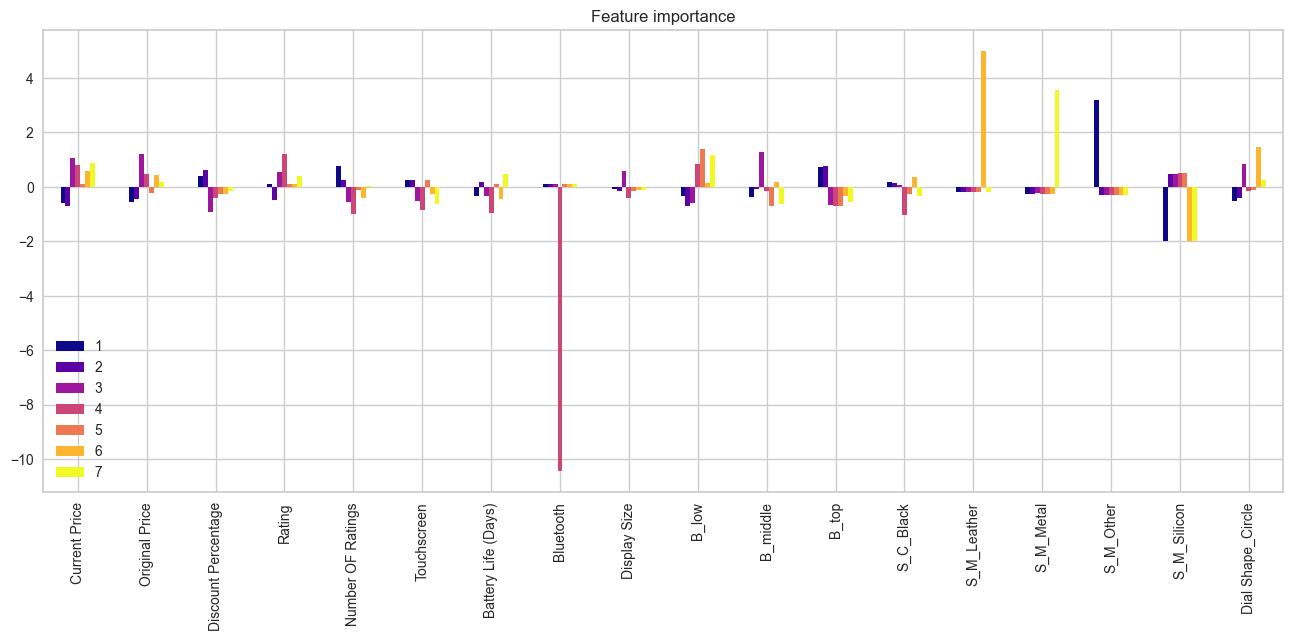

calinski_harabasz_score 70.96293259602037
Silhouette score:  0.2400372135863614
Davies-Bouldin score:  1.2855327025031333


In [44]:
for cut_height in [40, 37, 35, 30]:
    clusters = sch.fcluster(linkage_matrix, cut_height, criterion='distance')
    print3D( clusters, data_std)
    printFeatureImportance(data_std, clusters)
    getScore(clusters, data_std, f"Hierarchical Clustering {cut_height}")
 

## Primena algoritama


### Standard Data

#### KMeans

##### Elbow Method

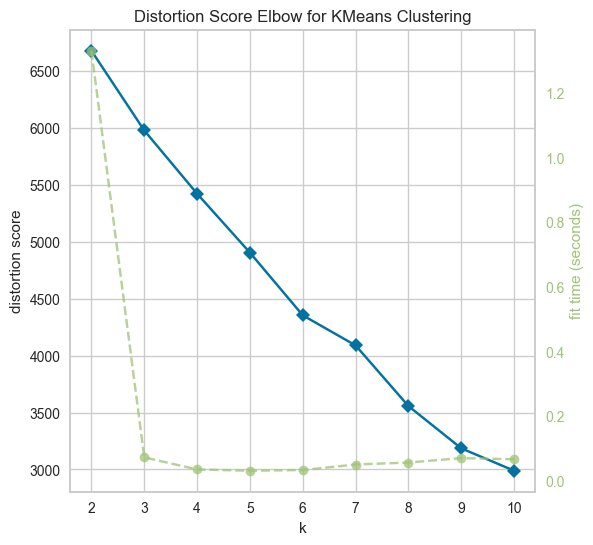

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
plt.figure(figsize=(6, 6))
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(features_std)
Elbow_M.show()


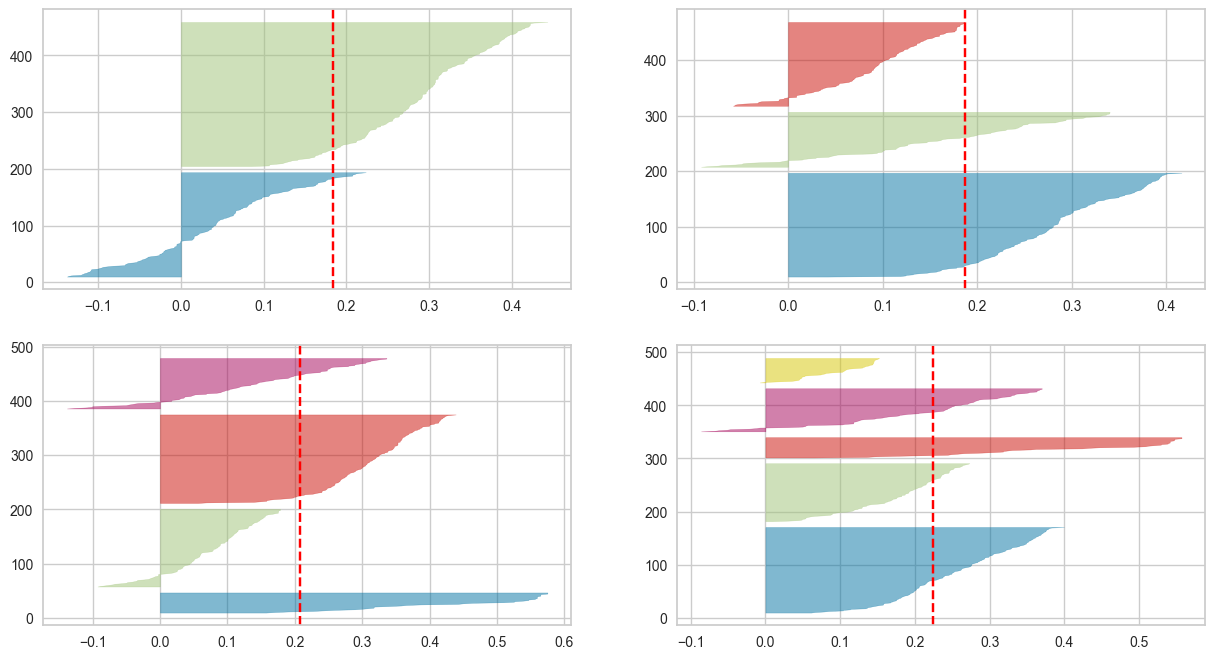

In [46]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]: 
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
 
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(features_std)

calinski_harabasz_score 66.89228744242254
Silhouette score:  0.20705672991760737
Davies-Bouldin score:  1.7586870317901266


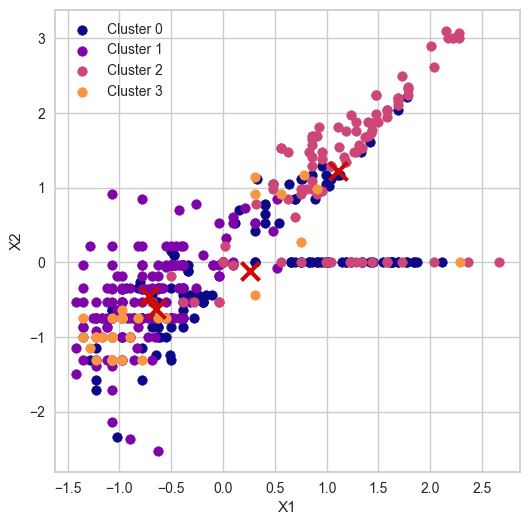

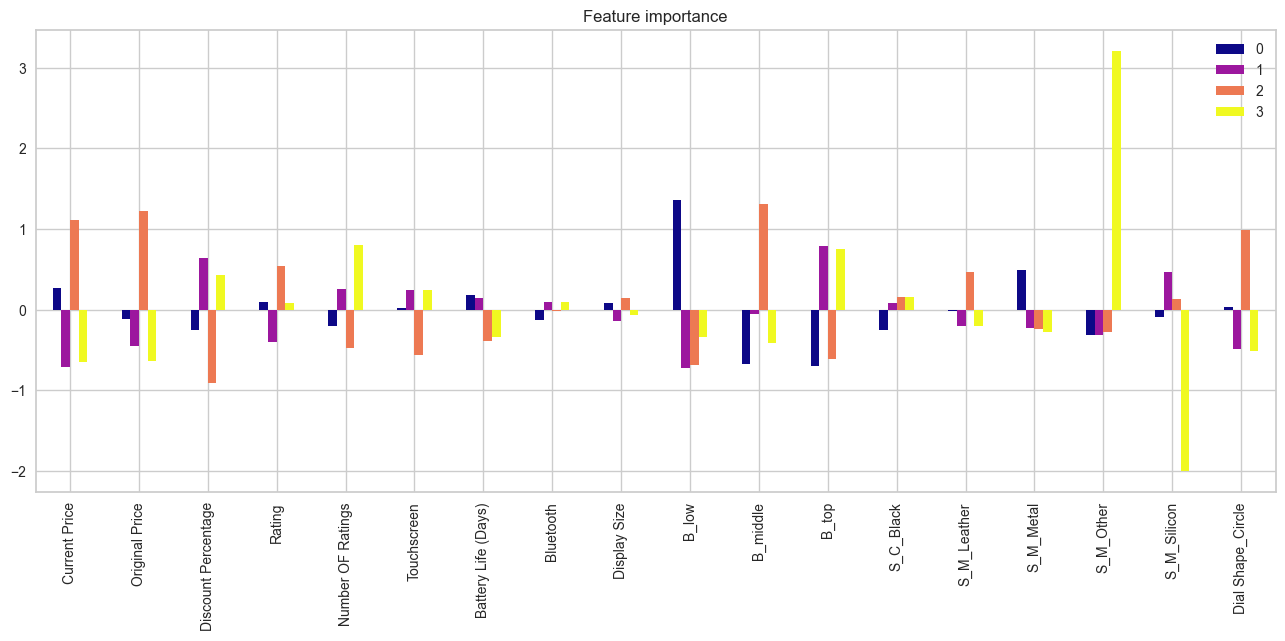

In [47]:
kmeans = KMeans(n_clusters=4, n_init=50, init='k-means++', max_iter=500).fit(features_std)

pred_kmeans = kmeans.predict(features_std)

claster_center_kmeans = kmeans.cluster_centers_

getScore(pred_kmeans, features_std, "KMeans")
printResult(pred_kmeans, features_std, claster_center_kmeans)
print3D(pred_kmeans, features_std)
printFeatureImportance(data_std, pred_kmeans)


#### MeanShift


calinski_harabasz_score 18.04122581877313
Silhouette score:  0.318051679578742
Davies-Bouldin score:  0.7459528994732088


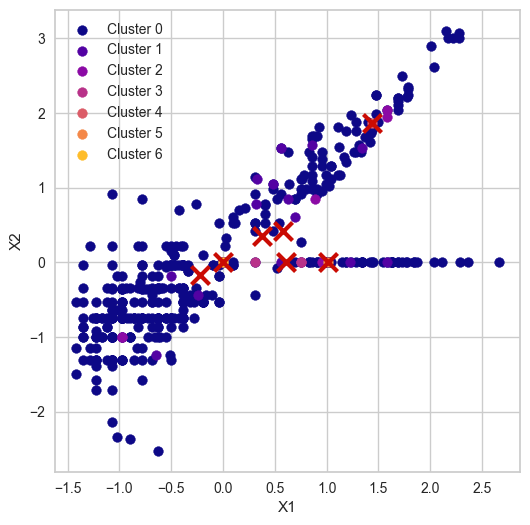

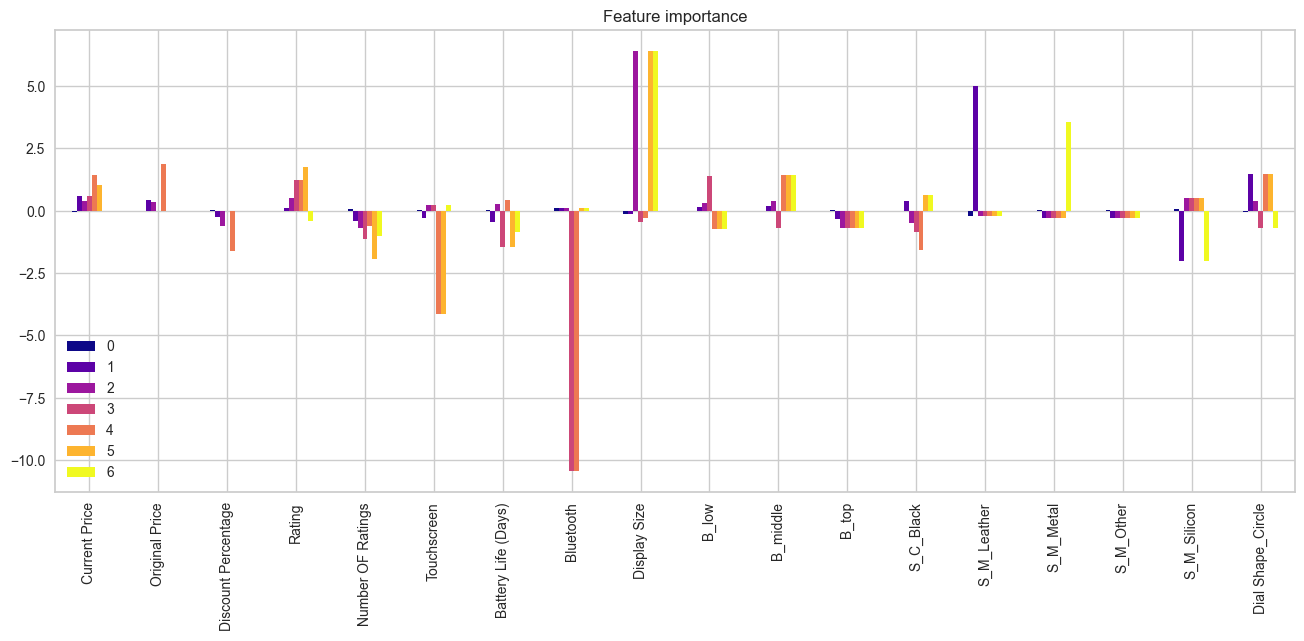

In [48]:
mean_shift = MeanShift().fit(features_std)

pred_means = mean_shift.predict(features_std)

claster_center_mean_s = mean_shift.cluster_centers_

getScore(pred_means, features_std, "MeanShift")
printResult(pred_means, features_std, claster_center_mean_s)
print3D(pred_means, features_std)

printFeatureImportance(data_std, pred_means)



#### DBSCAN

calinski_harabasz_score 8.885954810829642
Silhouette score:  -0.124967212907651
Davies-Bouldin score:  0.9945808609797092


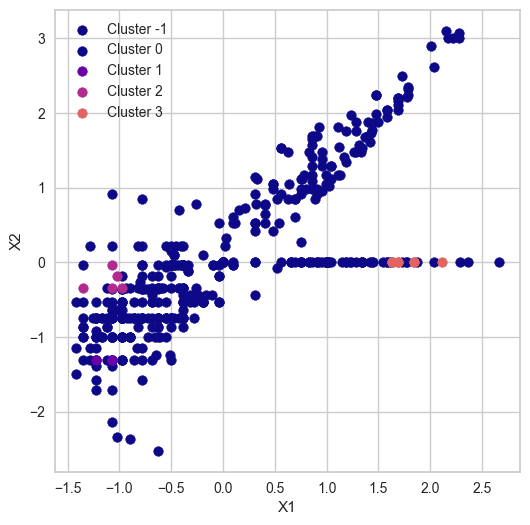

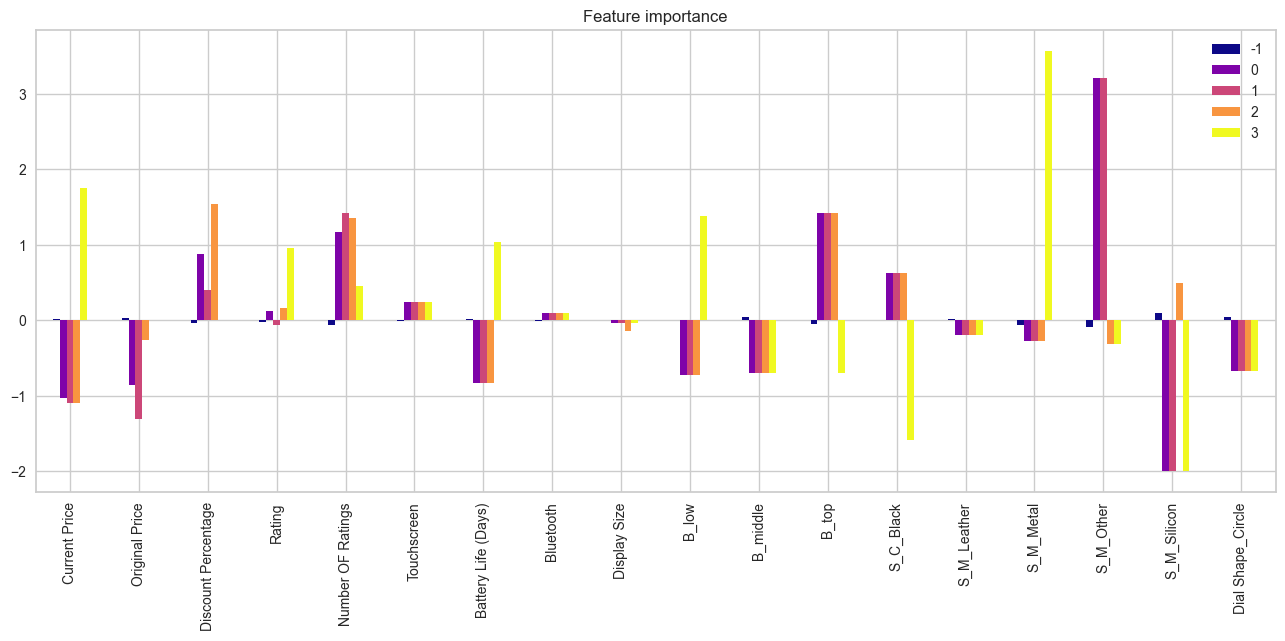

In [49]:
dbscan_optimal = DBSCAN()
pred_dbscan = dbscan_optimal.fit_predict(features_std)

getScore(pred_dbscan, features_std, "DBSCAN")
printResult(pred_dbscan, features_std, None)
print3D(pred_dbscan, features_std)

printFeatureImportance(data_std, pred_dbscan)

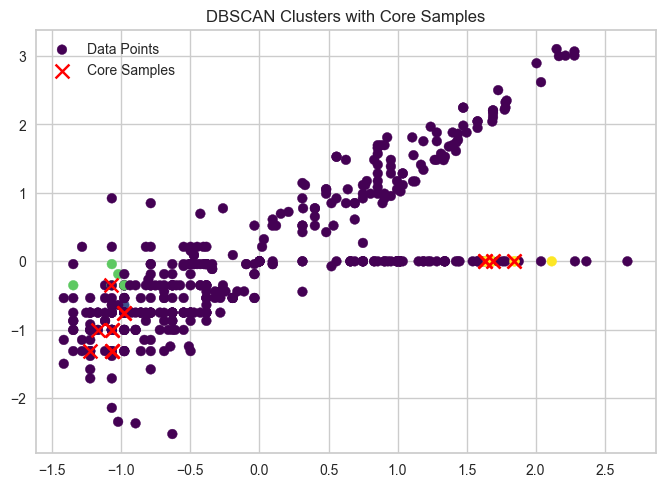

In [50]:
core_samples_mask = np.zeros_like(pred_dbscan, dtype=bool)
core_samples_mask[dbscan_optimal.core_sample_indices_] = True

core_samples = features_std[core_samples_mask]

plt.scatter(features_std[:, 0], features_std[:, 1], c=pred_dbscan, cmap='viridis', marker='o', label='Data Points')
plt.scatter(core_samples[:, 0], core_samples[:, 1], c='red', marker='x', s=100, label='Core Samples')
plt.title('DBSCAN Clusters with Core Samples')
plt.legend()
plt.show()

#### Agglomerative clustering

Elbow Method to determine the number of clusters to be formed:


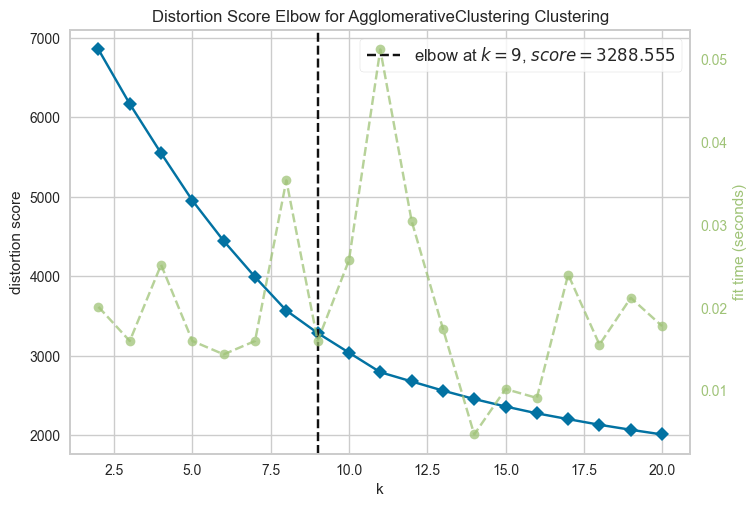

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=20)
Elbow_M.fit(features_std)
Elbow_M.show()

calinski_harabasz_score 62.07077782305087
Silhouette score:  0.20016127498738598
Davies-Bouldin score:  1.8627128025065183


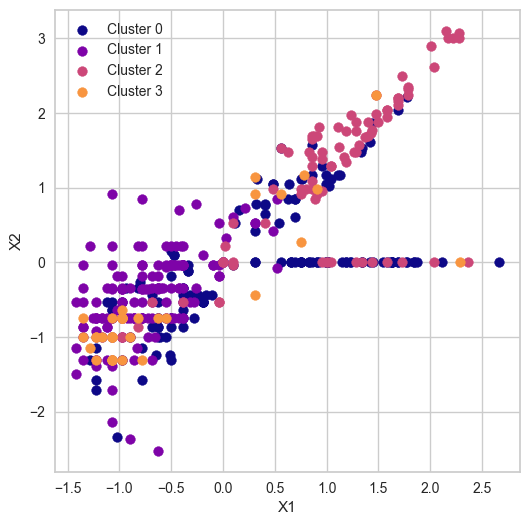

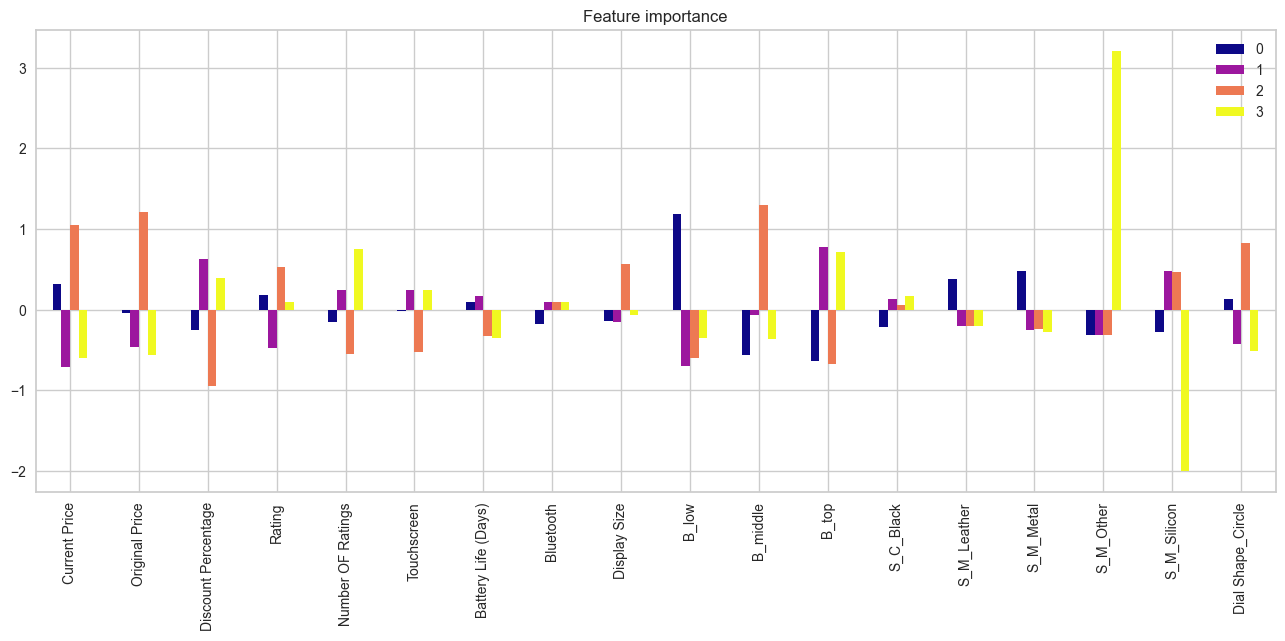

In [52]:
ac_model = AgglomerativeClustering(n_clusters=4, compute_distances=True)
ac_pred = ac_model.fit_predict(features_std)

getScore(ac_pred, features_std, "Agglomerative")
printResult(ac_pred, features_std, None)
print3D(ac_pred, features_std)

printFeatureImportance(data_std, ac_pred)

calinski_harabasz_score 65.07618049144945
Silhouette score:  0.215468799829357
Davies-Bouldin score:  1.6538354871756955


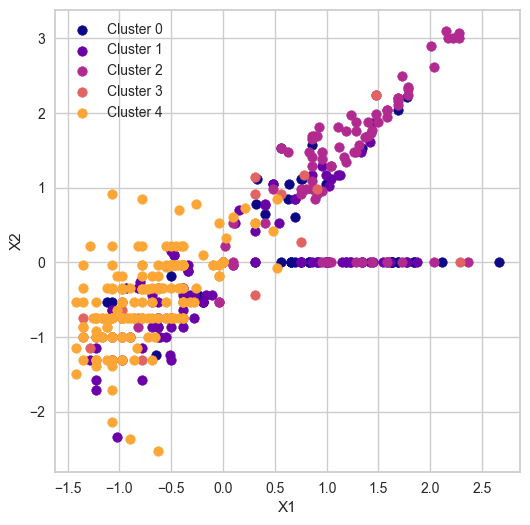

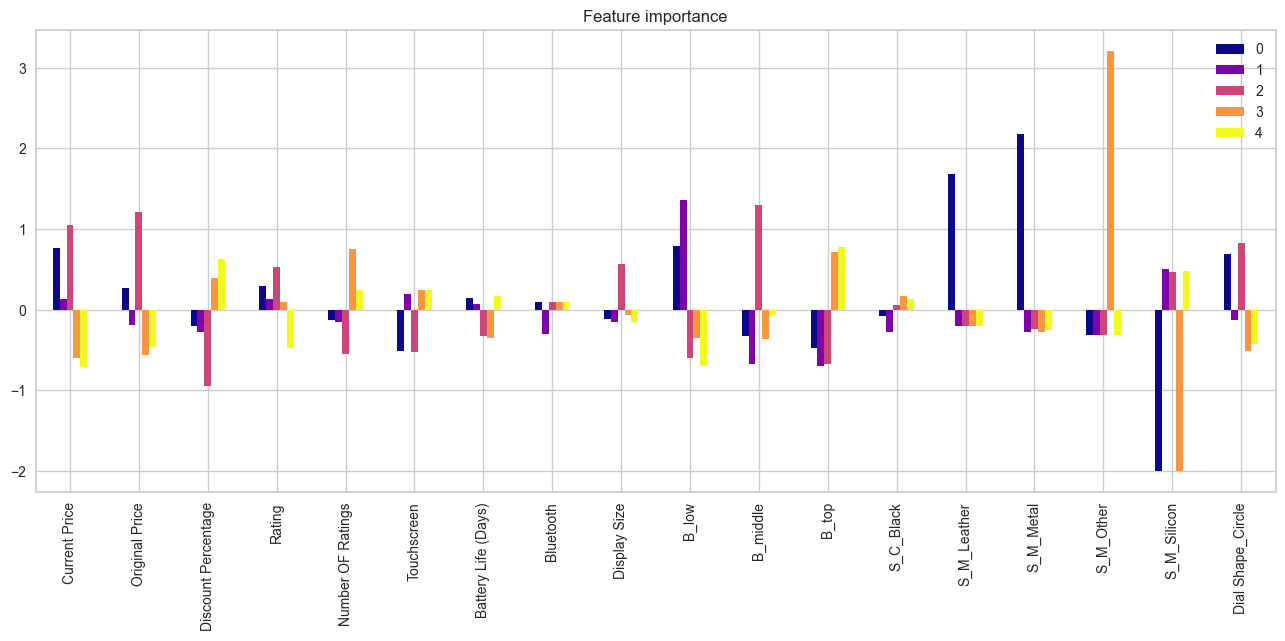

In [53]:
ac_model = AgglomerativeClustering(n_clusters=5, compute_distances=True)
ac_pred = ac_model.fit_predict(features_std)

getScore(ac_pred, features_std, "Agglomerative")
printResult(ac_pred, features_std, None)
print3D(ac_pred, features_std)
printFeatureImportance(data_std, ac_pred)

In [54]:
data.columns

Index(['Current Price', 'Original Price', 'Discount Percentage', 'Rating',
       'Number OF Ratings', 'Touchscreen', 'Battery Life (Days)', 'Bluetooth',
       'Display Size', 'B_low', 'B_middle', 'B_top', 'S_C_Black', 'S_C_Other',
       'S_M_Leather', 'S_M_Metal', 'S_M_Other', 'S_M_Silicon',
       'Dial Shape_Circle', 'Dial Shape_Rectangle'],
      dtype='object')

#### Gaussian mixture

3
4
calinski_harabasz_score 45.8787303161753
Silhouette score:  0.16195852490661658
Davies-Bouldin score:  2.1934692465948054


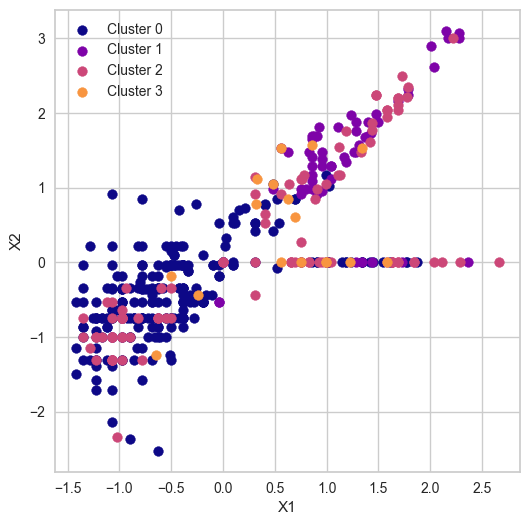

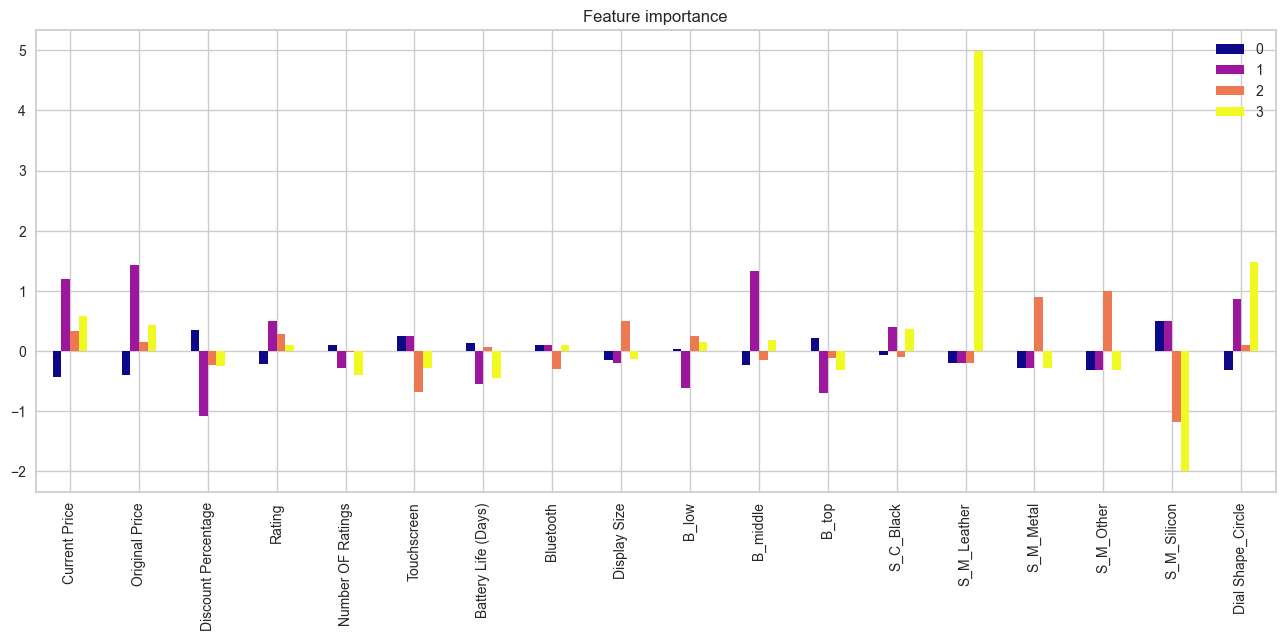

In [55]:

best_gmm = None
best_gmm_labels = None
n_components_range = range(3, 5)  

X_gaus = features_std

for k in n_components_range:
    gm_model = GaussianMixture(n_components=k, covariance_type='spherical')
    gm_model.fit(features_std)
    gm_labels = gm_model.predict(features_std)

    if best_gmm is None or gm_model.bic(features_std) < best_gmm.bic(features_std):
        best_gmm = gm_model
        best_gmm_labels = gm_labels
        print(k)


getScore(best_gmm_labels, features_std, "Gaussian Mixture")
printResult(best_gmm_labels, features_std, None)
print3D(best_gmm_labels, features_std)
printFeatureImportance(data_std, best_gmm_labels)


#### Spectar clustering


calinski_harabasz_score 60.16452476608516
Silhouette score:  0.23052912099122927
Davies-Bouldin score:  1.6557751506528477


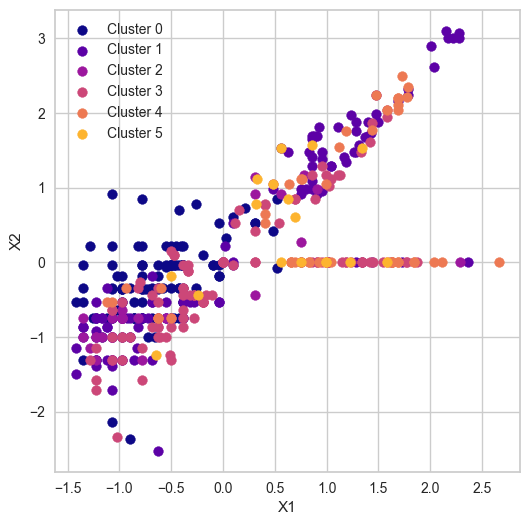

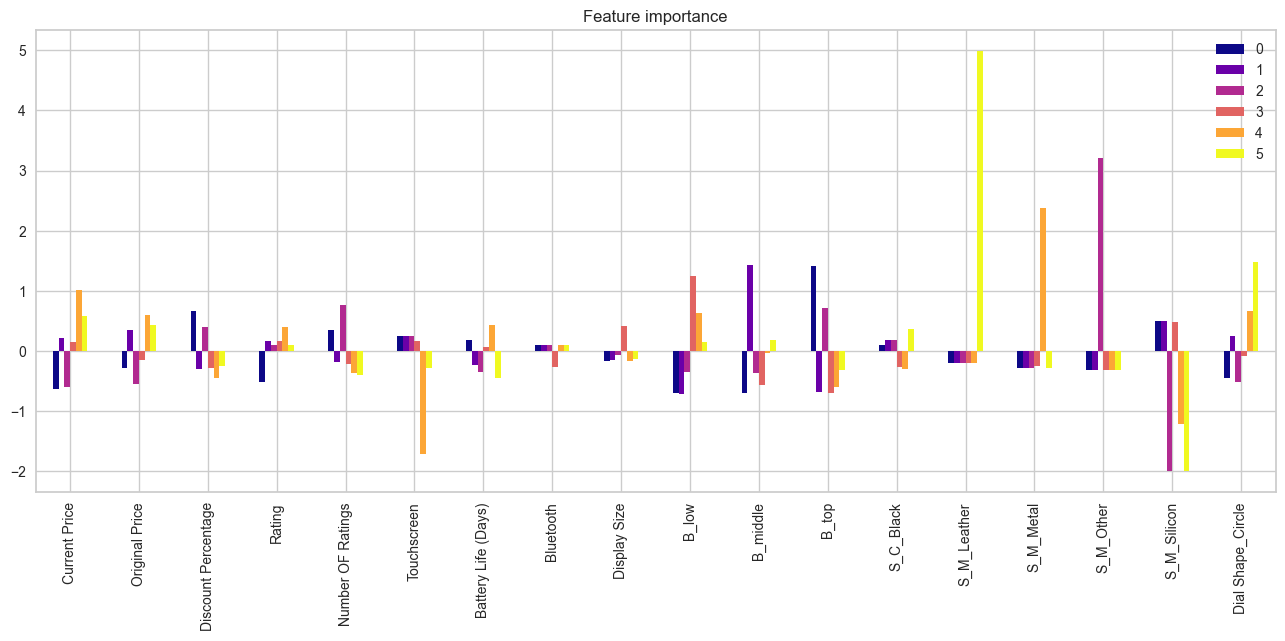

In [56]:

n_clusters = 6 

spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
labels = spectral.fit_predict(features_std)

getScore(labels, features_std, "Spectar clustering")
printResult(labels, features_std, None)
print3D(labels, features_std)
printFeatureImportance(data_std, labels)

### Data reduction with PCA

In [57]:
pca = PCA(n_components=3, random_state=80)
pca.fit(features_std)
data_pca = pd.DataFrame(pca.transform(features_std), columns=(["f1","f2", "f3"]))
pca.explained_variance_ratio_.cumsum()


array([0.21041948, 0.32841411, 0.43124546])

#### KMeans

Elbow Method to determine the number of clusters to be formed:


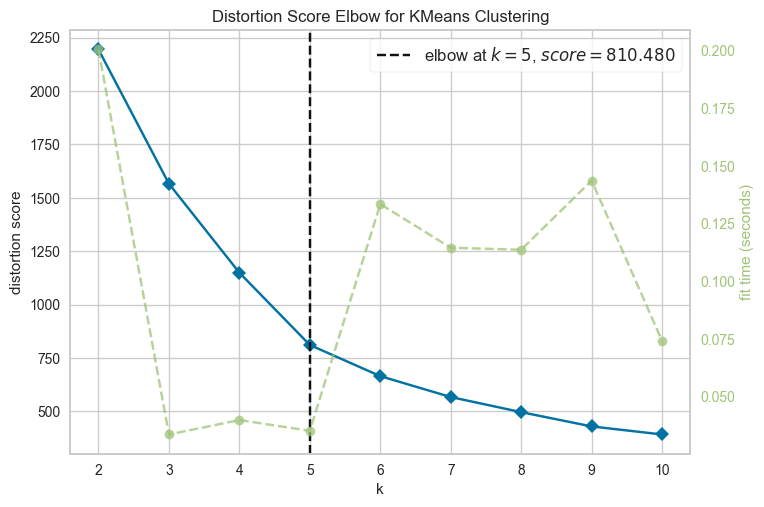

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_pca)
Elbow_M.show()

calinski_harabasz_score 349.536370884218
Silhouette score:  0.45593007167687777
Davies-Bouldin score:  0.7620520918250664


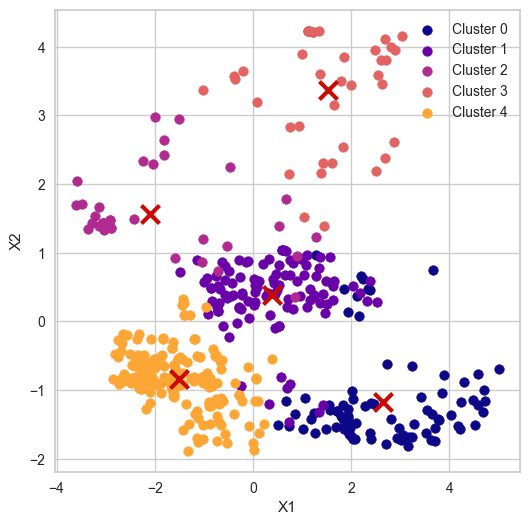

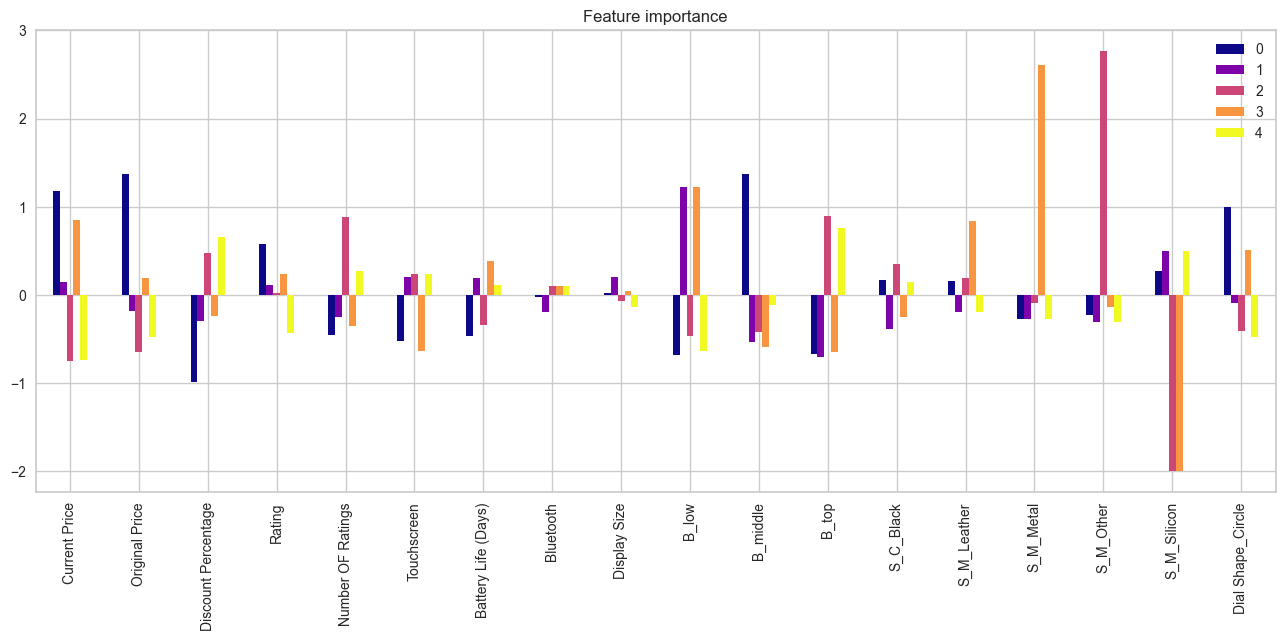

In [59]:
kmeans_pca = KMeans(n_clusters=5, n_init=50, init='k-means++', max_iter=500).fit(data_pca)
pred_kmeans_pca = kmeans_pca.predict(data_pca)
claster_center_kmeans_pca = kmeans_pca.cluster_centers_

labels = kmeans.labels_

getScore(pred_kmeans_pca, data_pca, "PCA KMeans")
printResult(pred_kmeans_pca, data_pca.values, claster_center_kmeans_pca )
print3D(pred_kmeans_pca, data_pca)
printFeatureImportance(data_std, pred_kmeans_pca)

#### DBSCAN

calinski_harabasz_score 79.24298091443134
Silhouette score:  0.09056044560652449
Davies-Bouldin score:  1.144664956917482


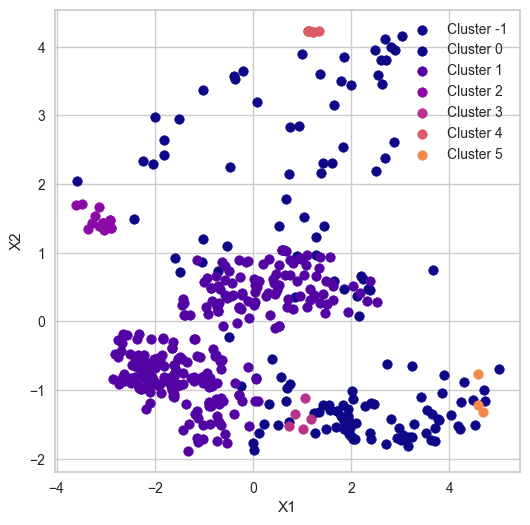

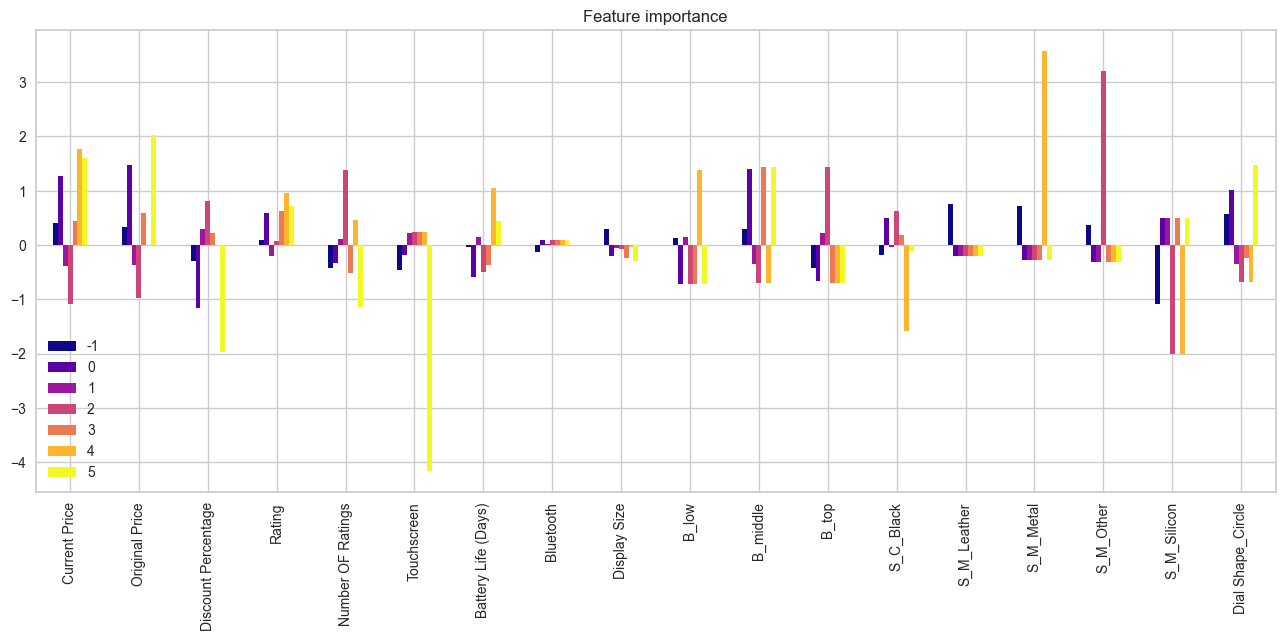

In [60]:
dbscan_optimal_pca = DBSCAN()
pred_dbscan_pca = dbscan_optimal_pca.fit_predict(data_pca)

getScore(pred_dbscan_pca, data_pca, "PCA DBSCAN")
printResult(pred_dbscan_pca, data_pca.values, None )
print3D(pred_dbscan_pca, data_pca)
printFeatureImportance(data_std, pred_dbscan_pca)


#### Agglomerative

Elbow Method to determine the number of clusters to be formed:


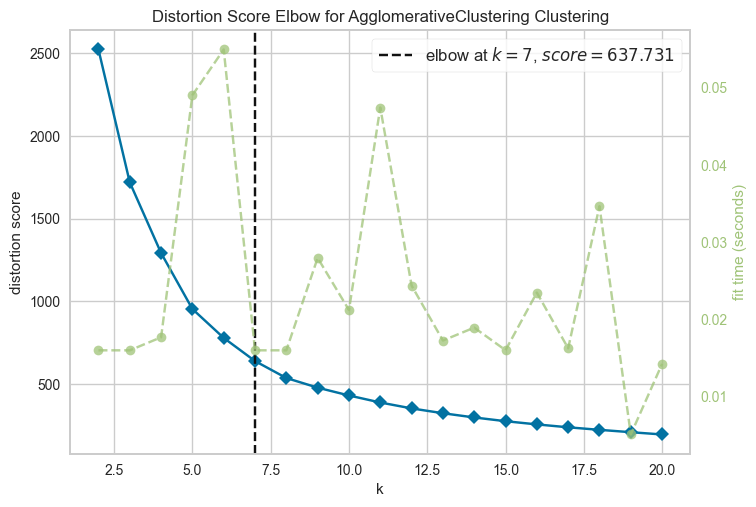

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [61]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=20)
Elbow_M.fit(data_pca)
Elbow_M.show()


calinski_harabasz_score 314.3327389871234
Silhouette score:  0.3702947317661763
Davies-Bouldin score:  0.8820757038191596


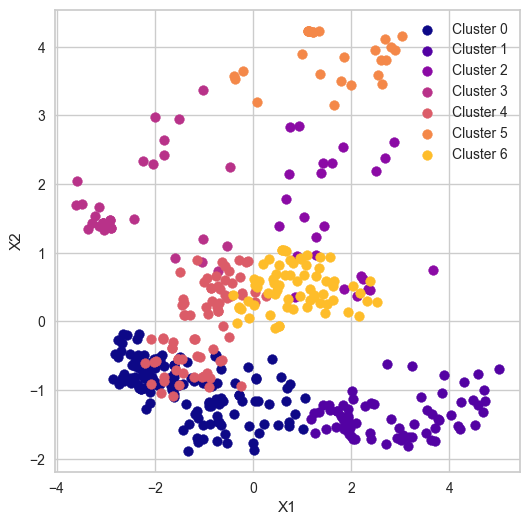

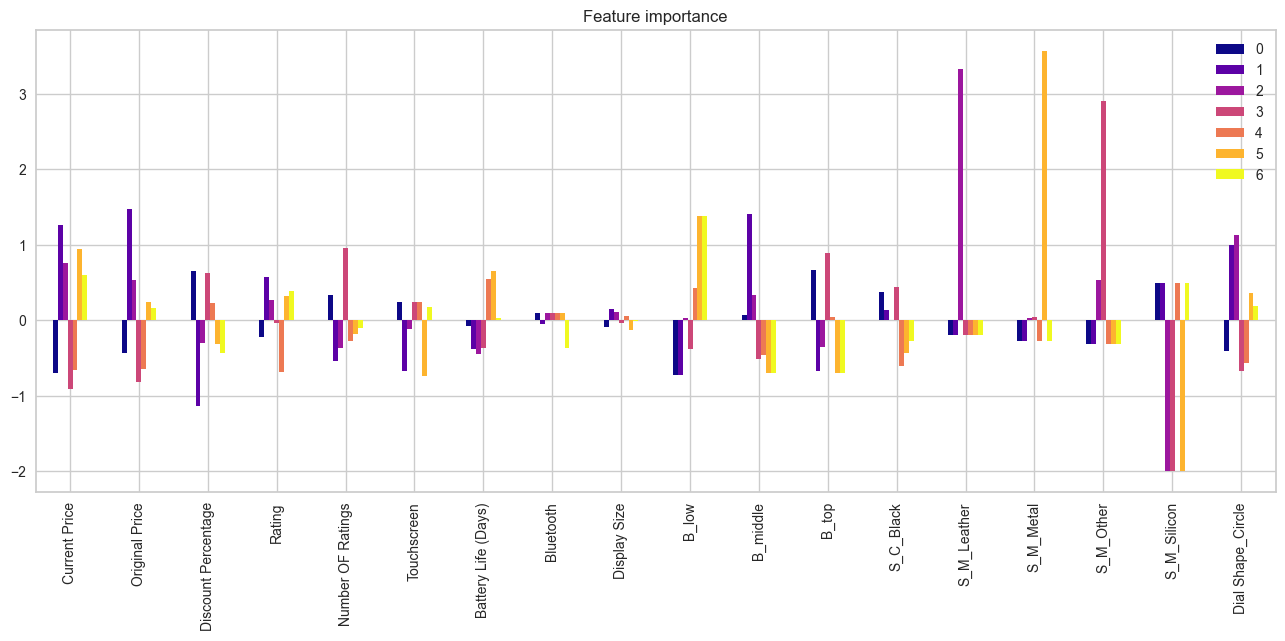

In [62]:
ac_model_pca = AgglomerativeClustering(n_clusters=7, compute_distances=True)
ac_pred_pca = ac_model_pca.fit_predict(data_pca)

getScore(ac_pred_pca, data_pca, "PCA Agglomerative")
printResult(ac_pred_pca, data_pca.values, None )
print3D(ac_pred_pca, data_pca)
printFeatureImportance(data_std, ac_pred_pca)


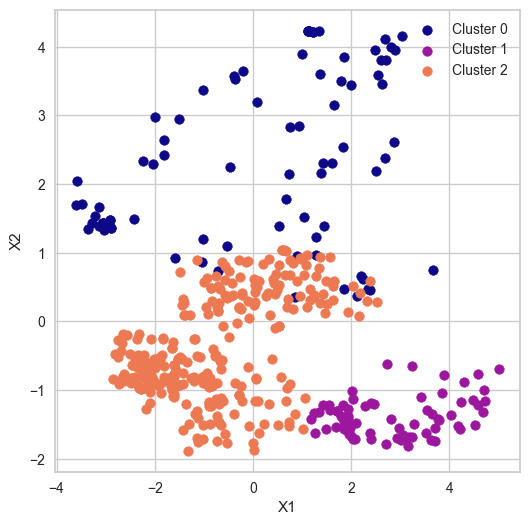

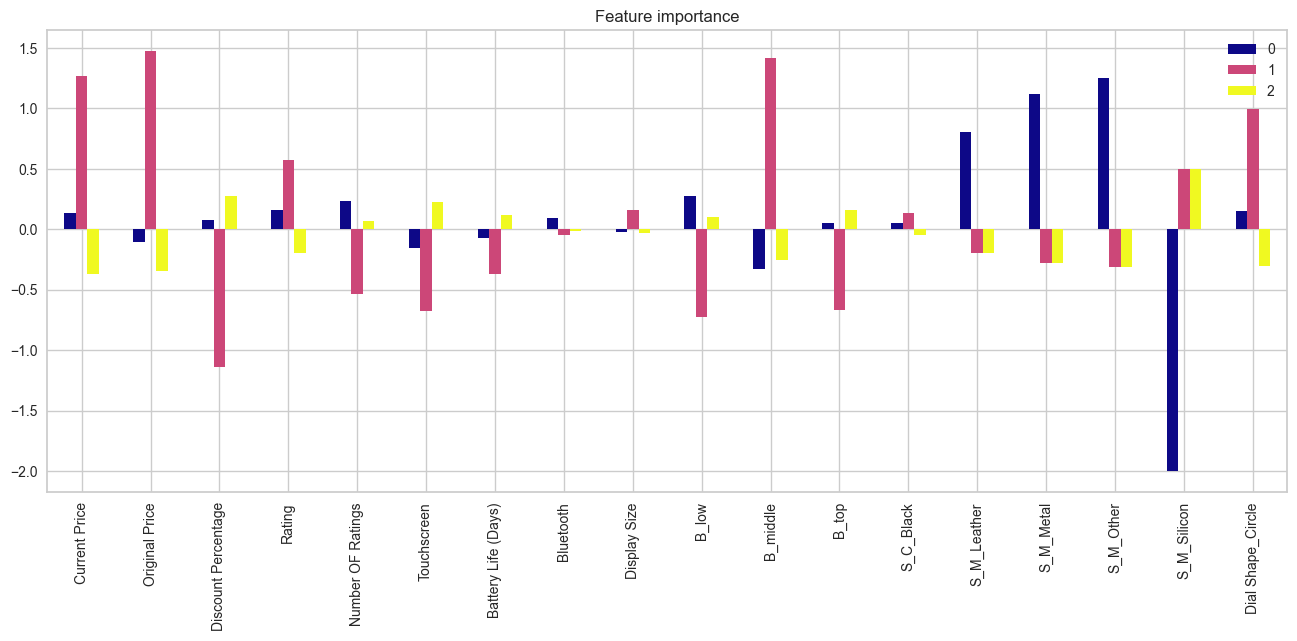

In [63]:
ac_model_pca = AgglomerativeClustering(n_clusters=3, compute_distances=True)
ac_pred_pca = ac_model_pca.fit_predict(data_pca)

printResult(ac_pred_pca, data_pca.values, None )
print3D(ac_pred_pca, data_pca)
printFeatureImportance(data_std, ac_pred_pca)


#### Gaussian mixture

calinski_harabasz_score 280.14353977826624
Silhouette score:  0.4210398612054643
Davies-Bouldin score:  0.8601696387554776


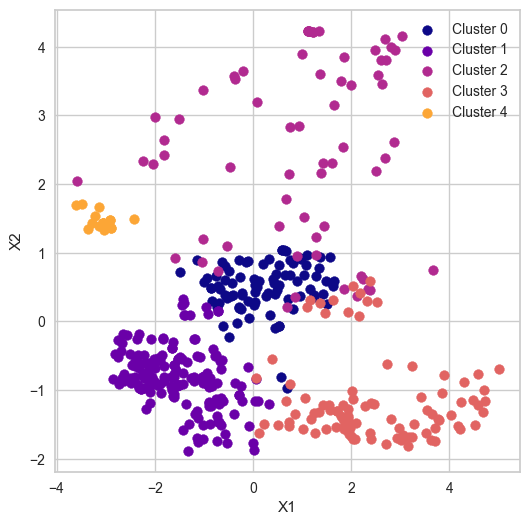

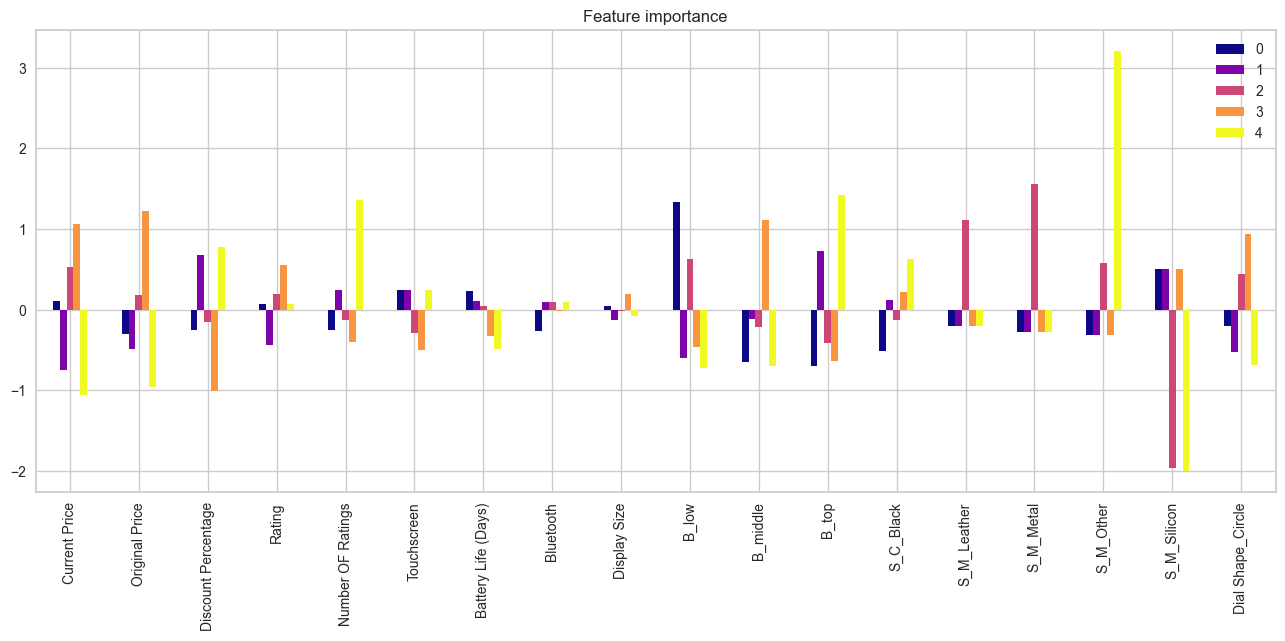

In [64]:

gm_model = GaussianMixture(n_components=5, covariance_type='spherical')
gm_model.fit(data_pca)
gm_labels = gm_model.predict(data_pca)

getScore(gm_labels, data_pca, "PCA Gaussian Mixture")
printResult(gm_labels, data_pca.values, None)
print3D(gm_labels, data_pca)
printFeatureImportance(data_std, gm_labels)


#### Spectral Clustering

calinski_harabasz_score 82.87852947147174
Silhouette score:  0.22701138246354952
Davies-Bouldin score:  1.4050785779888595


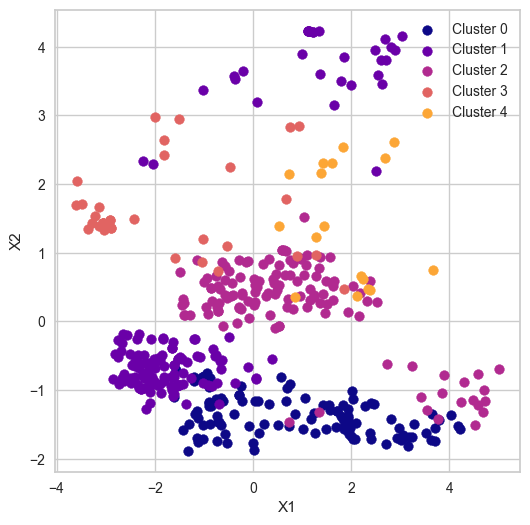

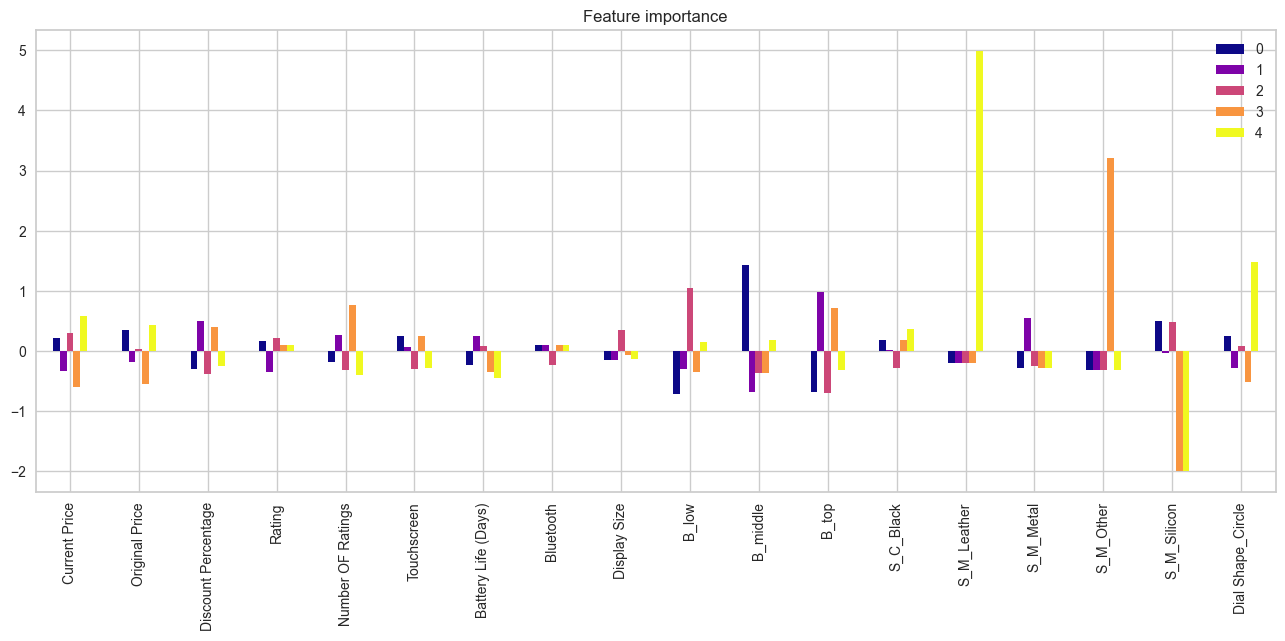

In [65]:

n_clusters = 5 

spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
labels = spectral.fit_predict(features_std)

getScore(labels, data_pca, "PCA Spectar clustering")
printResult(labels, data_pca.values, None)
print3D(labels, data_pca)
printFeatureImportance(data_std, labels)


### PCA sa 4 komponente

In [66]:
pca4 = PCA(n_components=4, random_state=80)
pca4.fit(features_std)
data_pca4 = pd.DataFrame(pca4.transform(features_std), columns=(["f1","f2", "f3", "f4"]))
pca4.explained_variance_ratio_.cumsum()

array([0.21041948, 0.32841411, 0.43124546, 0.50549057])

#### KMeans

calinski_harabasz_score 212.57057777256622
Silhouette score:  0.367815529814422
Davies-Bouldin score:  0.9997064134386052


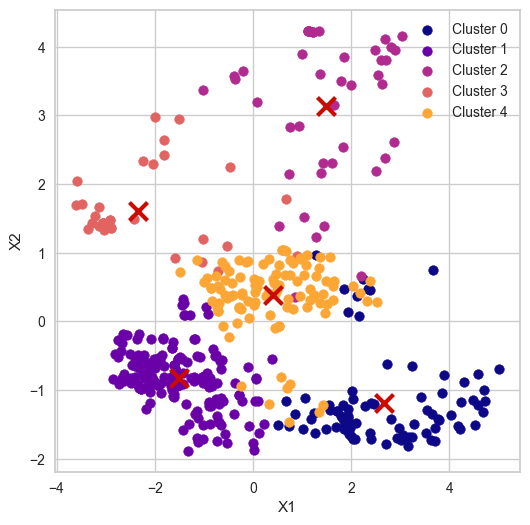

In [67]:
kmeans_pca4 = KMeans(n_clusters=5, n_init=50, init='k-means++', max_iter=500).fit(data_pca4)
pred_kmeans_pca4 = kmeans_pca4.predict(data_pca4)
claster_center_kmeans_pca4 = kmeans_pca4.cluster_centers_

labels = kmeans.labels_

getScore(pred_kmeans_pca4, data_pca4, "PCA 4 KMeans")
printResult(pred_kmeans_pca4, data_pca4.values,claster_center_kmeans_pca4 )
print3D(pred_kmeans_pca4, data_pca4)


#### DBSCAN

calinski_harabasz_score 19.926370116798136
Silhouette score:  -0.10317510345072081
Davies-Bouldin score:  1.2980494166290284


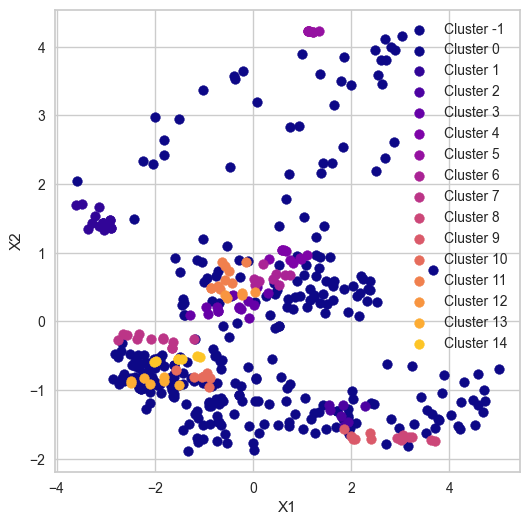

In [68]:
dbscan_optimal_pca4 = DBSCAN()
pred_dbscan_pca4 = dbscan_optimal_pca4.fit_predict(data_pca4)

getScore(pred_dbscan_pca4, data_pca4, "PCA 4 DBSCAN")
printResult(pred_dbscan_pca4, data_pca4.values, None )
print3D(pred_dbscan_pca4, data_pca4)

#### Agglomerative

calinski_harabasz_score 177.05638674026002
Silhouette score:  0.34382497660509626
Davies-Bouldin score:  0.9546187621844396


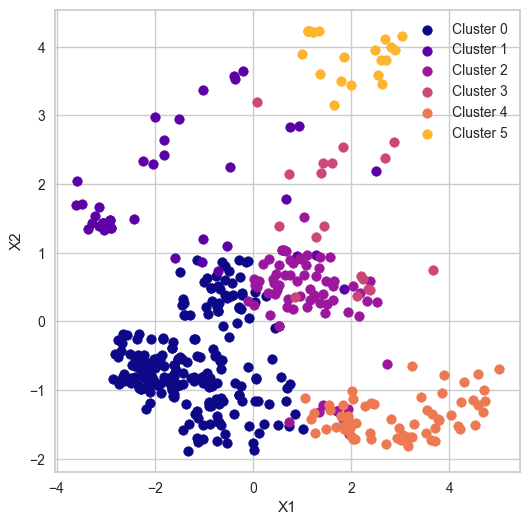

In [69]:
ac_model_pca4 = AgglomerativeClustering(n_clusters=6, compute_distances=True)
ac_pred_pca4 = ac_model_pca4.fit_predict(data_pca4)

getScore(ac_pred_pca4, data_pca4, "PCA 4 Agglomerative")
printResult(ac_pred_pca4, data_pca4.values, None )
print3D(ac_pred_pca4, data_pca4)


### Redukcija ficera


raspoela po klasterima za kmeans

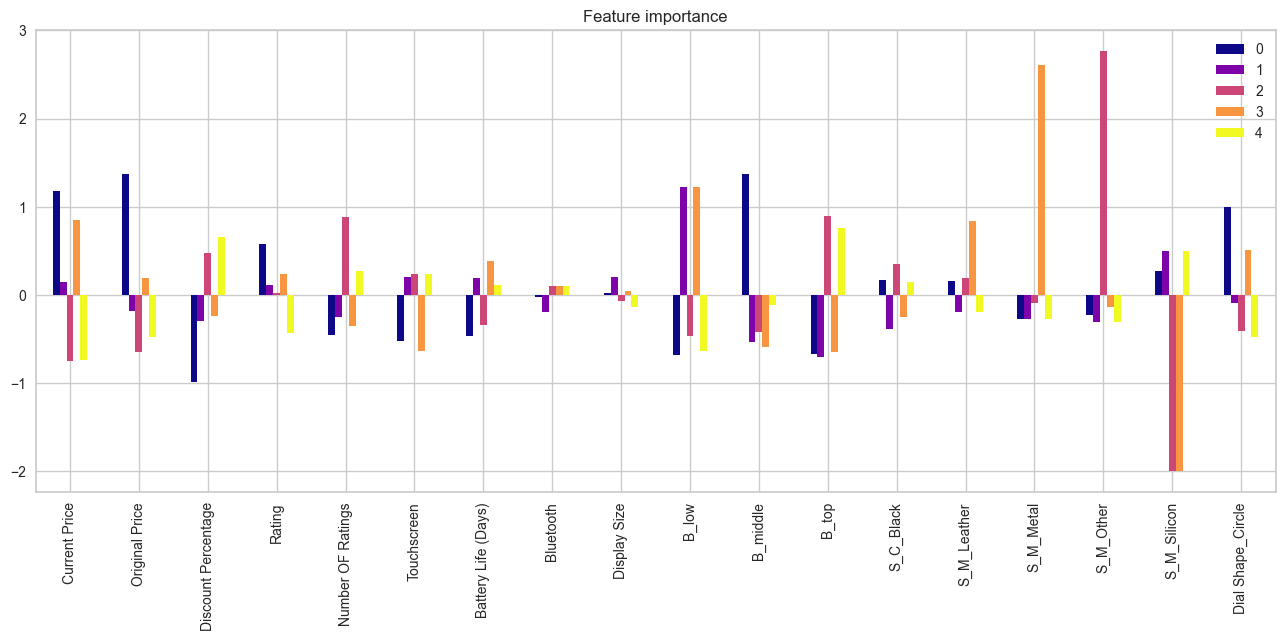

In [70]:
printFeatureImportance(data_std, pred_kmeans_pca)

In [71]:
data1.columns

Index(['Current Price', 'Original Price', 'Discount Percentage', 'Rating',
       'Number OF Ratings', 'Touchscreen', 'Battery Life (Days)', 'Bluetooth',
       'Display Size', 'B_low', 'B_middle', 'B_top', 'S_C_Black',
       'S_M_Leather', 'S_M_Metal', 'S_M_Other', 'S_M_Silicon',
       'Dial Shape_Circle'],
      dtype='object')

izbacivanje anje bitnih kolona

In [86]:
delete_cols = [ 'Bluetooth',  'Display Size','Touchscreen' ]
data2 = data1.copy()
data2.drop(columns=delete_cols, inplace=True)
data2.head()

Current Price  Original Price  Discount Percentage  Rating  \
0      11.326475       11.406453             7.686318     4.0   
1       8.242493        9.740910            77.651627     4.3   
2       7.600402        8.985946            74.981227     3.8   
3       7.494986        9.903438            91.004550     4.3   
4       7.377134        8.516993            68.013603     4.1   

   Number OF Ratings  Battery Life (Days)  B_low  B_middle  B_top  S_C_Black  \
0           4.174387                  8.0  False     False   True       True   
1           9.942131                  3.5  False     False   True       True   
2           9.986173                  8.0  False     False   True       True   
3           9.491300                  3.5  False     False   True       True   
4           9.539716                  8.0  False     False   True       True   

   S_M_Leather  S_M_Metal  S_M_Other  S_M_Silicon  Dial Shape_Circle  
0        False      False      False         True              False  
1        False      False      False         True              False  
2        False      False      False         True              False  
3        False      False      False         True              False  
4        False      False       True        False              False

In [101]:
scaler = StandardScaler()
data_st_r = scaler.fit_transform(data2)
data_std_r = pd.DataFrame(data_st_r, columns=data2.columns)

pca1 = PCA(n_components=3, random_state=80)
pca1.fit(data_std_r)
data_pca_r = pd.DataFrame(pca1.transform(data_std_r), columns=(["f1","f2", "f3"]))
pca1.explained_variance_ratio_.cumsum()

array([0.24146809, 0.38269154, 0.50515454])

Elbow Method to determine the number of clusters to be formed:


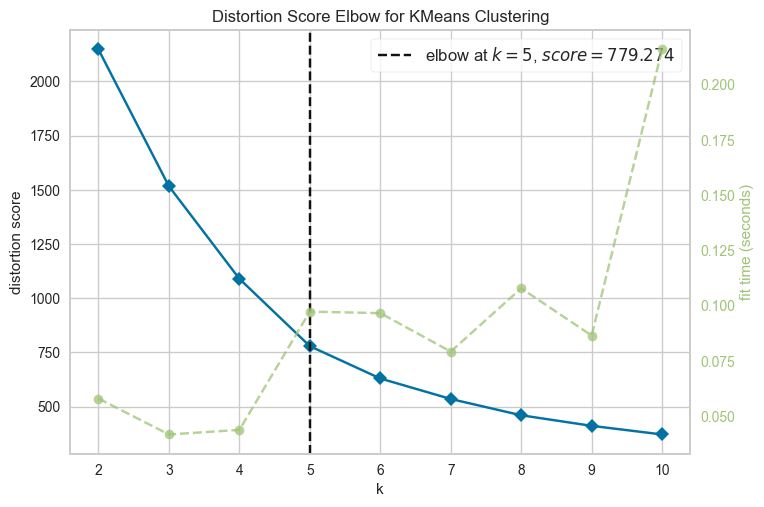

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [102]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_pca_r)
Elbow_M.show()

calinski_harabasz_score 373.30857133631554
Silhouette score:  0.47697778053353773
Davies-Bouldin score:  0.7216281839430446


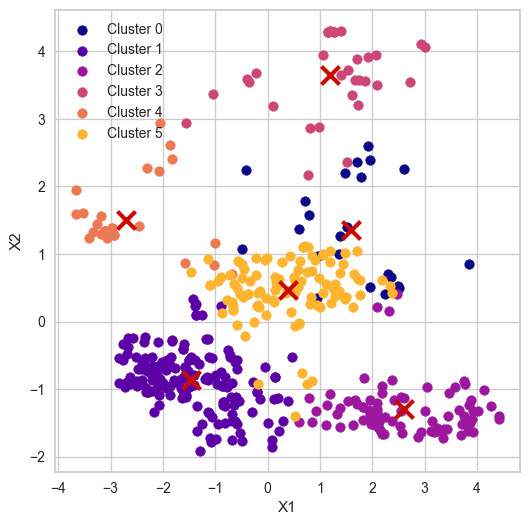

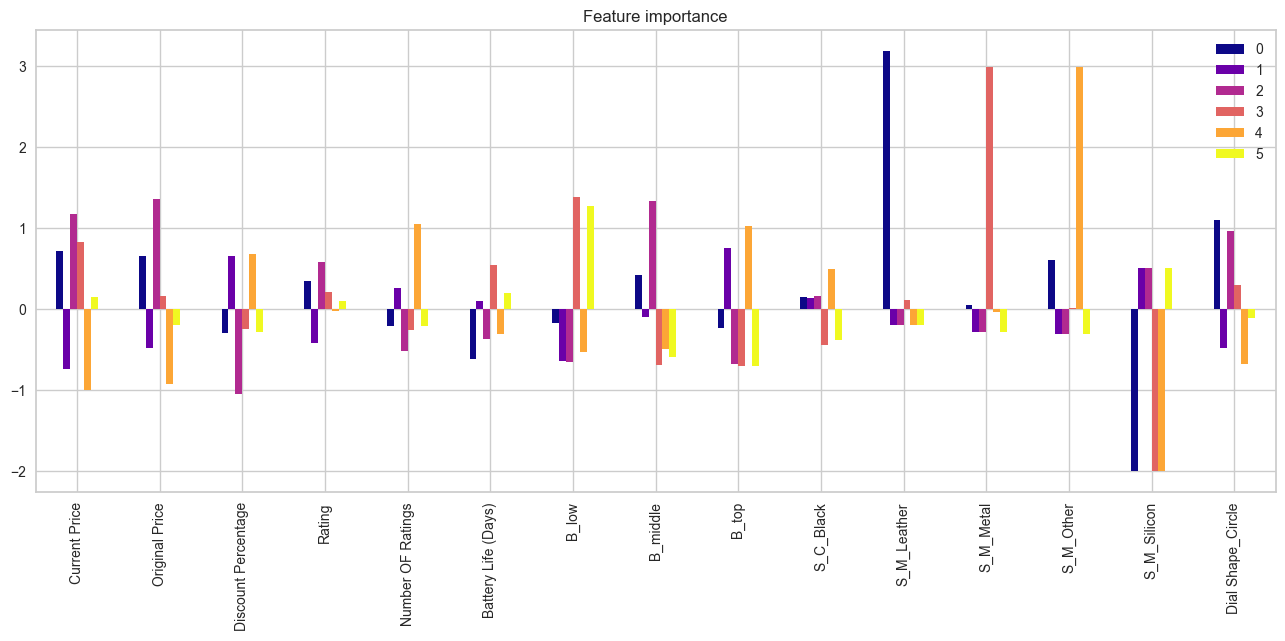

In [103]:
kmeans_pca_r = KMeans(n_clusters=6, n_init=50, init='k-means++', max_iter=500).fit(data_pca_r)
pred_kmeans_pca_r = kmeans_pca_r.predict(data_pca_r)
claster_center_kmeans_pca_r = kmeans_pca_r.cluster_centers_

labels = kmeans.labels_

getScore(pred_kmeans_pca_r, data_pca_r, "Reduced PCA KMeans")
printResult(pred_kmeans_pca_r, data_pca_r.values,claster_center_kmeans_pca_r )
print3D(pred_kmeans_pca_r, data_pca_r)
printFeatureImportance(data_std_r, pred_kmeans_pca_r)

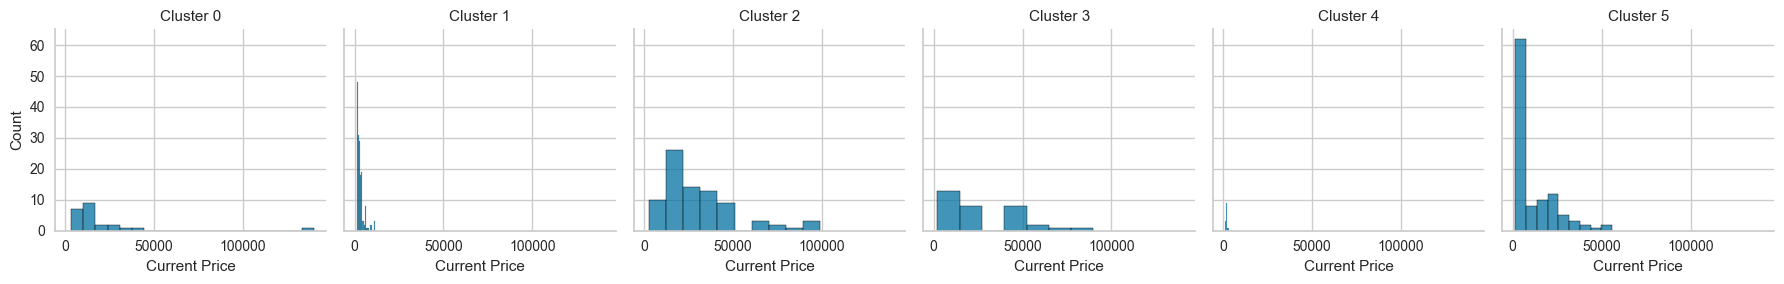

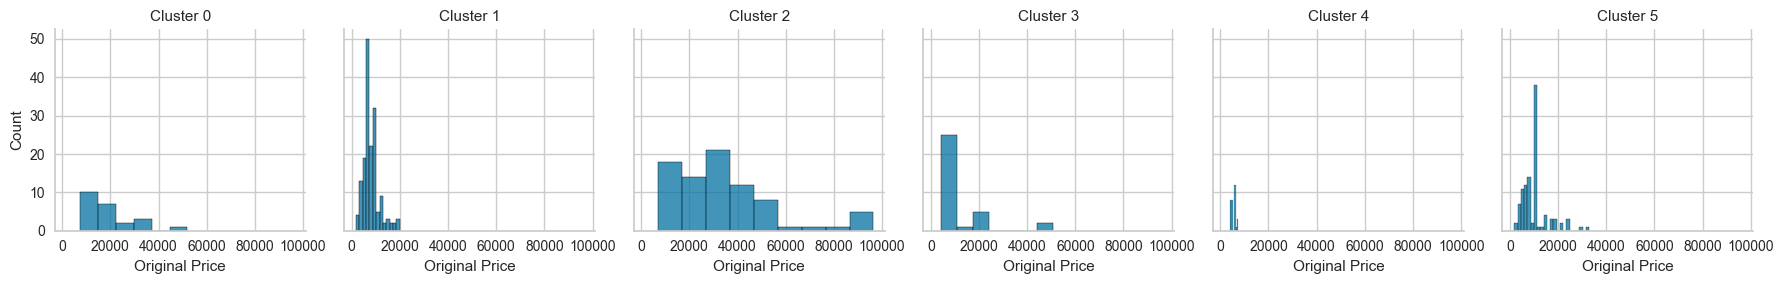

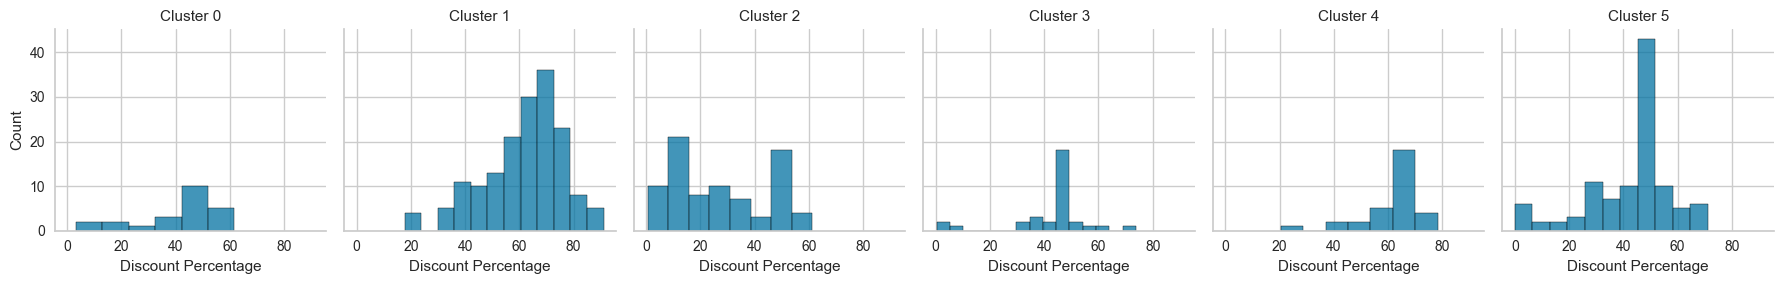

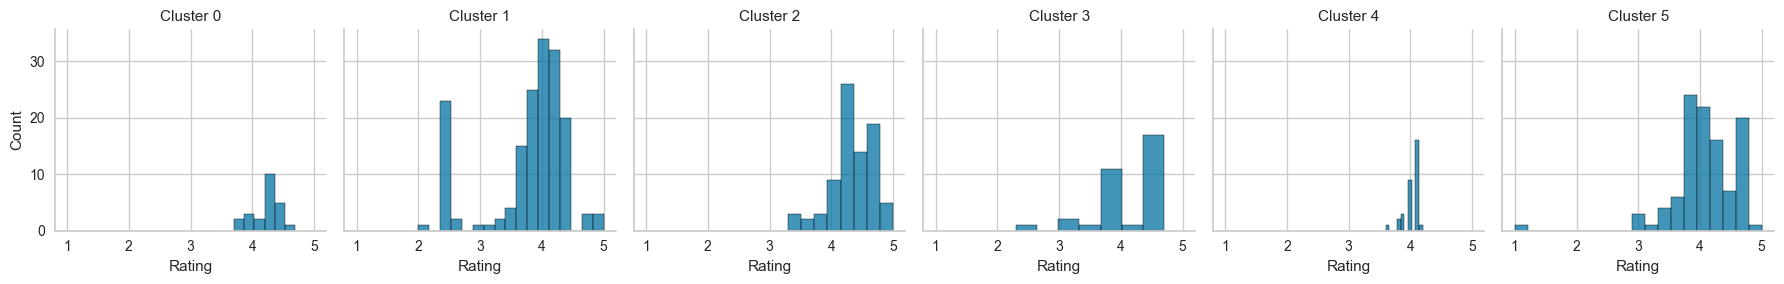

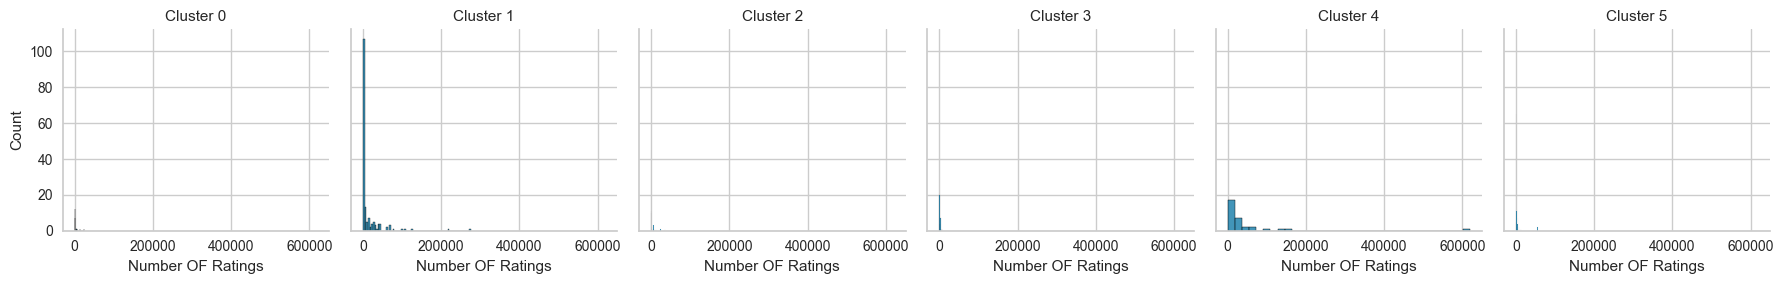

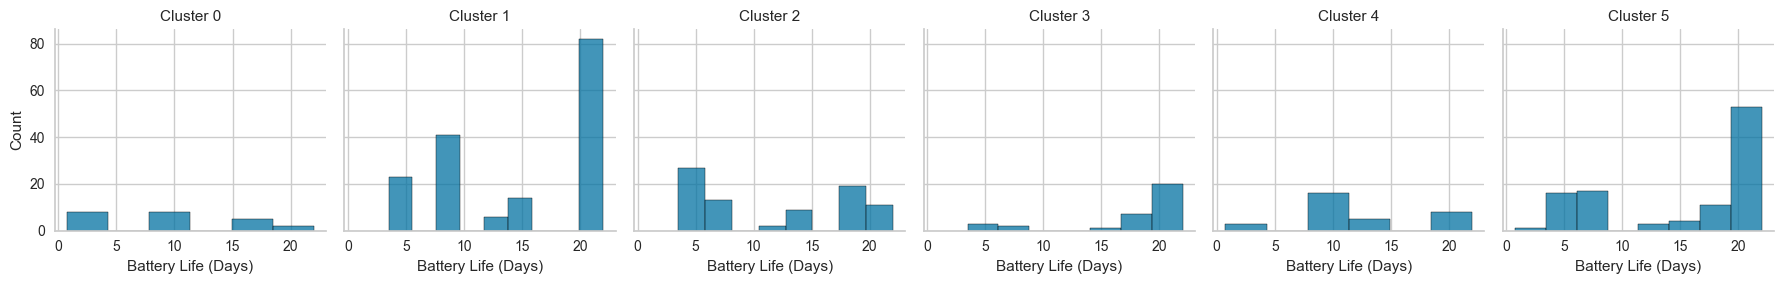

In [104]:
attributes = ['Current Price', 'Original Price', 'Discount Percentage', 'Rating', 'Number OF Ratings', 'Battery Life (Days)']
columns = ['Current Price', 'Original Price',  'Number OF Ratings']
df_cluster1 = data2.copy()

for column in columns:
    df_cluster1[column] = [np.exp(x) for x in df_cluster1[column]]

df_cluster1['Cluster'] = pred_kmeans_pca_r
for attribute in attributes:
    g = sns.FacetGrid(df_cluster1, col="Cluster", col_wrap=6)
    g.map(sns.histplot, attribute, kde=False)
    g.set_titles("Cluster {col_name}")
    plt.tight_layout()
    plt.show()

raspodela po klasteria za agglomerative

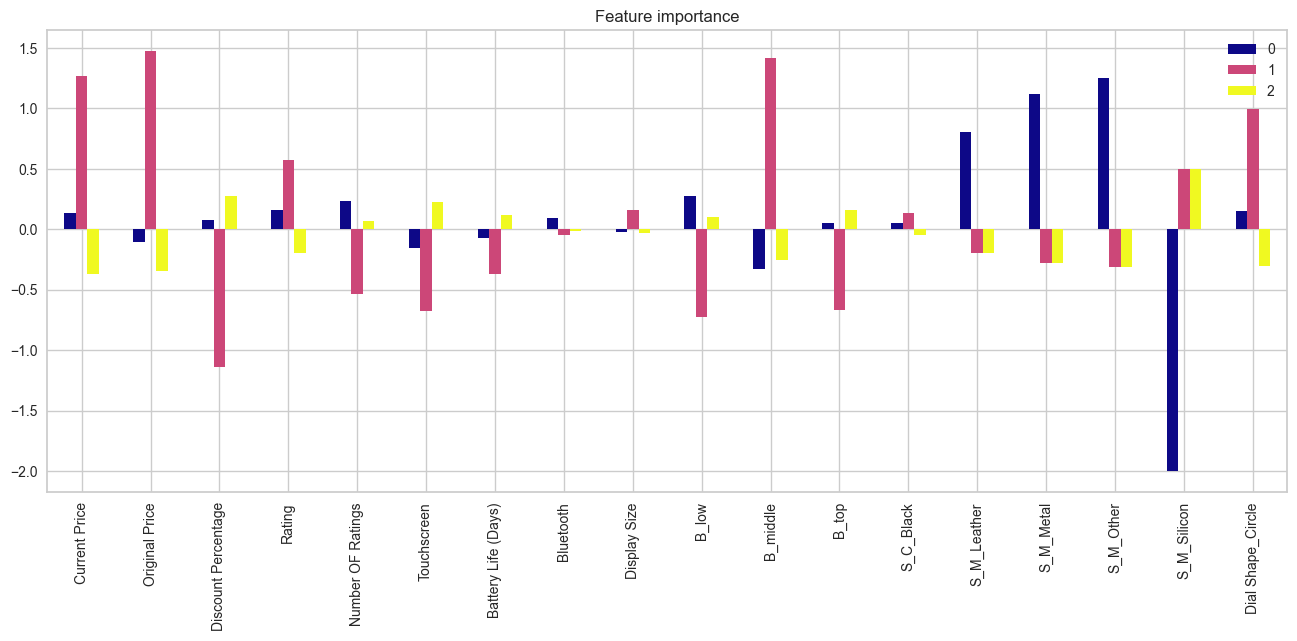

In [85]:
printFeatureImportance(data_std, ac_pred_pca)


In [80]:
delete_cols = [ 'Battery Life (Days)', 'Bluetooth','Display Size' , 'S_C_Black']
data4 = data1.copy()
data4.drop(columns=delete_cols, inplace=True)
data4.head()


Current Price  Original Price  Discount Percentage  Rating  \
0      11.326475       11.406453             7.686318     4.0   
1       8.242493        9.740910            77.651627     4.3   
2       7.600402        8.985946            74.981227     3.8   
3       7.494986        9.903438            91.004550     4.3   
4       7.377134        8.516993            68.013603     4.1   

   Number OF Ratings  Touchscreen  B_low  B_middle  B_top  S_M_Leather  \
0           4.174387         True  False     False   True        False   
1           9.942131         True  False     False   True        False   
2           9.986173         True  False     False   True        False   
3           9.491300         True  False     False   True        False   
4           9.539716         True  False     False   True        False   

   S_M_Metal  S_M_Other  S_M_Silicon  Dial Shape_Circle  
0      False      False         True              False  
1      False      False         True              False  
2      False      False         True              False  
3      False      False         True              False  
4      False       True        False              False

In [81]:

scaler = StandardScaler()
features_std_reduced_a = scaler.fit_transform(data4)
data_std_a_reduced = pd.DataFrame(features_std_reduced_a, columns=data4.columns)

pca_reduced_a = PCA(n_components=3, random_state=80)
pca_reduced_a.fit(data_std_a_reduced)
data_pca_max_r = pd.DataFrame(pca_reduced_a.transform(data_std_a_reduced), columns=(["f1","f2", "f3"]))
pca_reduced_a.explained_variance_ratio_.cumsum()


array([0.26864002, 0.41836789, 0.53670911])

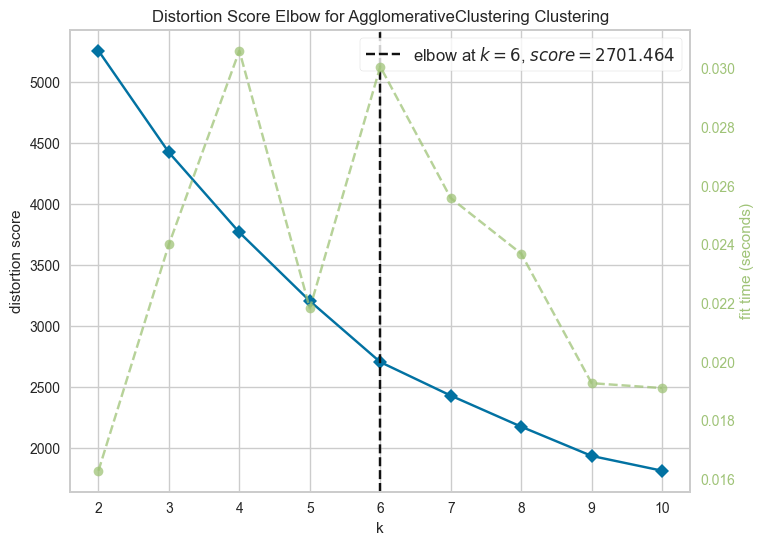

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [82]:
plt.figure(figsize=(8, 6))
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=10)
Elbow_M.fit(data_std_a_reduced)
Elbow_M.show()

calinski_harabasz_score 377.83511923657943
Silhouette score:  0.48991630996810714
Davies-Bouldin score:  0.755771088022786


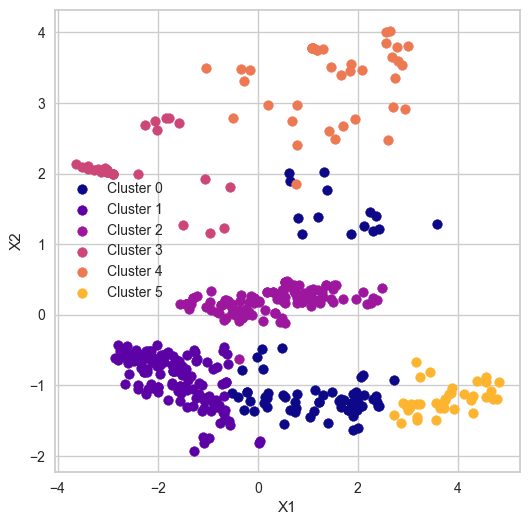

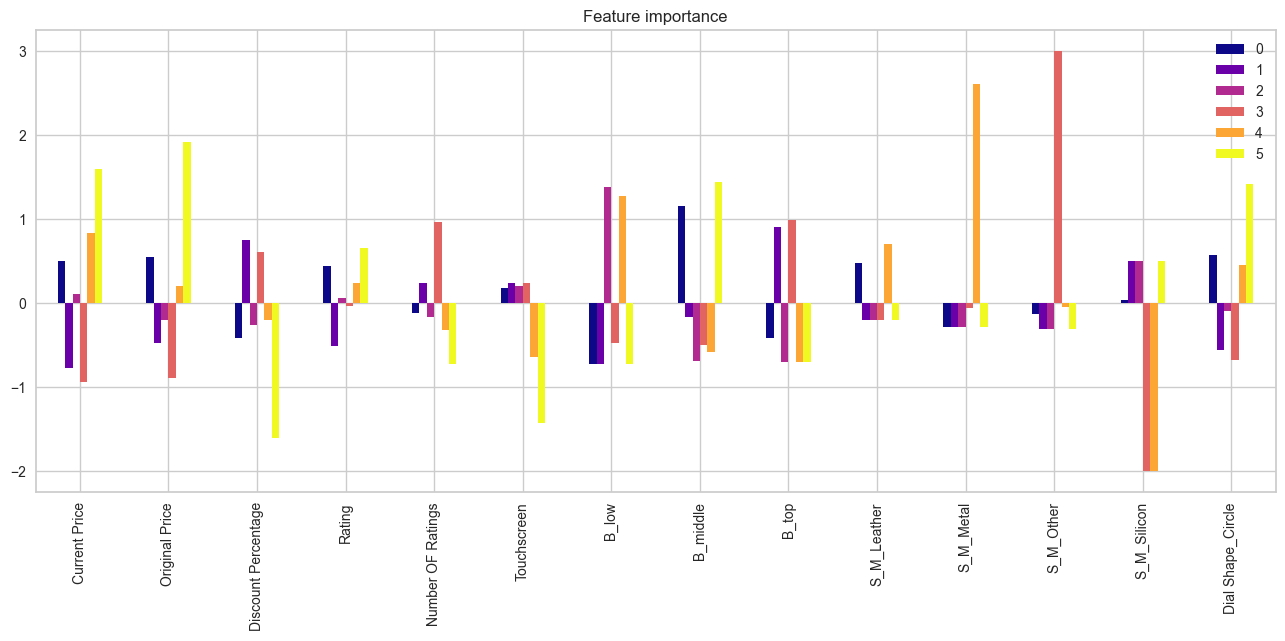

In [83]:
ac_model_pca_reduced = AgglomerativeClustering(n_clusters=6, compute_distances=True)
ac_pred_pca_reduced = ac_model_pca_reduced.fit_predict(data_pca_max_r)

getScore(ac_pred_pca_reduced, data_pca_max_r, "Reduced PCA Agglomerative")
printResult(ac_pred_pca_reduced, data_pca_max_r.values, None )
print3D(ac_pred_pca_reduced, data_pca_max_r)
printFeatureImportance(data_std_a_reduced, ac_pred_pca_reduced)

## Finalni Rezultati
---

In [99]:
result_df.sort_values(by='calinski_harabasz', ascending=False)

calinski_harabasz  Silhouette  Davies-Bouldin
Reduced PCA Agglomerative          377.835119    0.489916        0.755771
Reduced PCA KMeans                 356.572858    0.457704        0.749005
PCA KMeans                         349.536371    0.455930        0.762052
PCA Agglomerative                  314.332739    0.370295        0.882076
PCA Gaussian Mixture               280.143540    0.421040        0.860170
PCA 4 KMeans                       212.570578    0.367816        0.999706
PCA 4 Agglomerative                177.056387    0.343825        0.954619
PCA Spectar clustering              82.878529    0.227011        1.405079
PCA DBSCAN                          79.242981    0.090560        1.144665
Hierarchical Clustering 30          70.962933    0.240037        1.285533
Hierarchical Clustering 40          68.038063    0.143703        2.331606
KMeans                              66.892287    0.207057        1.758687
Agglomerative                       65.076180    0.215469        1.653835
Hierarchical Clustering 35          62.070778    0.200161        1.862713
Hierarchical Clustering 37          61.979237    0.177176        2.166994
Spectar clustering                  60.164525    0.230529        1.655775
Gaussian Mixture                    45.878730    0.161959        2.193469
PCA 4 DBSCAN                        19.926370   -0.103175        1.298049
MeanShift                           18.041226    0.318052        0.745953
DBSCAN                               8.885955   -0.124967        0.994581

## Analiza

Klaster 0  
+cena, rejtin, middle, koza, other,okrugli displej  
-popust, baterija, silikon  
popust do 60 posto, najvise 50

Klaster 1  
+popust, top, silikon, kvadrat displej, crni strap  
-cena, rejtint, low  
popust od 20 do 90, najvise 70
rejting od 3 do 4, a ima i 2.5
baterija 5, 10, 15, 20

Klaster 2  
+cena, middle, okrigli, rejting, pretezno silikon  
-popust, broj rejtinga, baterija, top, low  
popust do 60, najvise 10 i 50
rejting 2.5 i najvise oko 4

Klaster 3  
+cena, low, metalni, okrugli, baterija, rejting, strap u boji  
-popust, top, middle, broj rejtinga  
popust 50 
 najbitnije da su metalni i low, posle toga cena

Klaster 4  
+popust, broj rejtinga, top, strap samo ne silikon, crni strap, kvadrati  
-cena, baterija, silikon, top, middle  
popust 50
rejting nebitan

Klaster 5  
+low, silikon, kvadrat displej, strap u boji  
-popust, top, middle,   
popust od 0 do 70 najvise 50 posto
cena nebitna